In [1]:
from DataManager import CALFData, collateGCN
import numpy as np
import torch 
from Model import ContextAwareModel
from helpers.loss import ContextAwareLoss, SpottingLoss
from train import trainer
import pickle
from dataclasses import dataclass
import matplotlib.pyplot as plt
from Visualiser import collateVisGCN, Visualiser

# Model 1 - First try

In [2]:
@dataclass
class Args:
    receptive_field = 20
    framerate = 5
    chunks_per_epoch = 1824
    class_split = "alive"
    num_detections = 200
    chunk_size = 60
    batch_size = 32
    input_channel = 10
    feature_multiplier=1
    backbone_player = "GCN"
    max_epochs=100
    load_weights=None
    model_name="Testing_Model"
    evaluation_frequency=20
    dim_capsule=16
    lambda_coord=5.0
    lambda_noobj=0.5
    loss_weight_segmentation=0.005
    loss_weight_detection=1.0
    patience=25
    LR=1e-03
    GPU=0 
    max_num_worker=1
    loglevel='INFO'
    annotation_nr = 18

In [3]:
args = Args
collate_fn = collateGCN

train_dataset = CALFData(split="train", args=args)
validation_dataset = CALFData(split="validate", args=args)

train_loader = torch.utils.data.DataLoader(train_dataset,
            batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)

validate_loader = torch.utils.data.DataLoader(validation_dataset,
            batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)

# labels, targets, representations = next(iter(train_loader))

model = ContextAwareModel(num_classes=18, args=args)
criterion_segmentation = ContextAwareLoss(K=train_dataset.K_parameters)
criterion_spotting = SpottingLoss(lambda_coord=args.lambda_coord, lambda_noobj=args.lambda_noobj)
optimizer = torch.optim.Adam(model.parameters(), lr=args.LR, 
                            betas=(0.9, 0.999), eps=1e-07, 
                            weight_decay=0, amsgrad=False)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', verbose=True, patience=args.patience)

losses = trainer(train_loader, validate_loader,
                    model, optimizer, scheduler, 
                    [criterion_segmentation, criterion_spotting], 
                    [args.loss_weight_segmentation, args.loss_weight_detection],
                    model_name=args.model_name,
                    max_epochs=args.max_epochs, evaluation_frequency=args.evaluation_frequency)

Get labels & features: 100%|██████████| 2/2 [00:06<00:00,  3.29s/it]
Train 1: Time 7.546s (it:7.233s) Data:0.605s (it:0.544s) Loss 6.5064e+03 Loss Seg 4.8473e+04 Loss Spot 6.2641e+03 : 100%|███████| 57/57 [07:10<00:00,  7.55s/it]
Evaluate 1: Time 5.233s (it:5.061s) Data:0.546s (it:0.493s) Loss 6.2995e+03 Loss Seg 5.7678e+04 Loss Spot 6.0111e+03 : 100%|████| 57/57 [04:58<00:00,  5.23s/it]
Train 2: Time 7.031s (it:6.558s) Data:0.591s (it:0.530s) Loss 6.2373e+03 Loss Seg 4.4035e+04 Loss Spot 6.0171e+03 : 100%|███████| 57/57 [06:40<00:00,  7.03s/it]
Evaluate 2: Time 4.860s (it:4.886s) Data:0.529s (it:0.488s) Loss 6.2723e+03 Loss Seg 5.5650e+04 Loss Spot 5.9941e+03 : 100%|████| 57/57 [04:37<00:00,  4.86s/it]
Train 3: Time 6.554s (it:7.175s) Data:0.584s (it:1.009s) Loss 6.2204e+03 Loss Seg 4.1671e+04 Loss Spot 6.0121e+03 : 100%|███████| 57/57 [06:13<00:00,  6.55s/it]
Evaluate 3: Time 4.690s (it:5.015s) Data:0.530s (it:0.797s) Loss 6.2264e+03 Loss Seg 4.7163e+04 Loss Spot 5.9906e+03 : 100%|██

Epoch 00058: reducing learning rate of group 0 to 1.0000e-04.


Train 59: Time 6.731s (it:6.509s) Data:0.582s (it:0.526s) Loss 6.0515e+03 Loss Seg 1.7048e+04 Loss Spot 5.9662e+03 : 100%|██████| 57/57 [06:23<00:00,  6.73s/it]
Evaluate 59: Time 4.676s (it:4.642s) Data:0.530s (it:0.486s) Loss 6.1062e+03 Loss Seg 1.8442e+04 Loss Spot 6.0140e+03 : 100%|███| 57/57 [04:26<00:00,  4.68s/it]
Train 60: Time 6.749s (it:6.449s) Data:0.584s (it:0.531s) Loss 6.0131e+03 Loss Seg 1.6862e+04 Loss Spot 5.9288e+03 : 100%|██████| 57/57 [06:24<00:00,  6.75s/it]
Evaluate 60: Time 4.685s (it:4.632s) Data:0.531s (it:0.491s) Loss 6.1008e+03 Loss Seg 1.7381e+04 Loss Spot 6.0139e+03 : 100%|███| 57/57 [04:27<00:00,  4.69s/it]
Train 61: Time 6.808s (it:6.804s) Data:0.585s (it:0.530s) Loss 6.0234e+03 Loss Seg 1.6877e+04 Loss Spot 5.9390e+03 : 100%|██████| 57/57 [06:28<00:00,  6.81s/it]
Evaluate 61: Time 4.523s (it:4.484s) Data:0.529s (it:0.488s) Loss 6.1018e+03 Loss Seg 1.7559e+04 Loss Spot 6.0140e+03 : 100%|███| 57/57 [04:17<00:00,  4.52s/it]
Train 62: Time 6.712s (it:6.496s) 

Epoch 00084: reducing learning rate of group 0 to 1.0000e-05.


Train 85: Time 6.790s (it:6.685s) Data:0.585s (it:0.523s) Loss 5.9301e+03 Loss Seg 1.6903e+04 Loss Spot 5.8456e+03 : 100%|██████| 57/57 [06:27<00:00,  6.79s/it]
Evaluate 85: Time 4.706s (it:4.587s) Data:0.528s (it:0.488s) Loss 6.1651e+03 Loss Seg 1.7272e+04 Loss Spot 6.0787e+03 : 100%|███| 57/57 [04:28<00:00,  4.71s/it]
Train 86: Time 6.792s (it:6.627s) Data:0.585s (it:0.525s) Loss 5.9493e+03 Loss Seg 1.6811e+04 Loss Spot 5.8652e+03 : 100%|██████| 57/57 [06:27<00:00,  6.79s/it]
Evaluate 86: Time 4.699s (it:4.758s) Data:0.531s (it:0.493s) Loss 6.1949e+03 Loss Seg 1.7263e+04 Loss Spot 6.1085e+03 : 100%|███| 57/57 [04:27<00:00,  4.70s/it]
Train 87: Time 6.848s (it:6.708s) Data:0.598s (it:0.553s) Loss 5.9609e+03 Loss Seg 1.6675e+04 Loss Spot 5.8775e+03 : 100%|██████| 57/57 [06:30<00:00,  6.85s/it]
Evaluate 87: Time 4.520s (it:4.439s) Data:0.537s (it:0.491s) Loss 6.1591e+03 Loss Seg 1.7278e+04 Loss Spot 6.0727e+03 : 100%|███| 57/57 [04:17<00:00,  4.52s/it]
Train 88: Time 6.818s (it:6.786s) 

In [19]:
# torch.save(model, 'models/detector.pth.tar')

# with open('results/detector_results.pkl', 'wb') as file:
#     pickle.dump(losses, file)

In [4]:
with open('results/detector_results.pkl', 'rb') as file:
    losses = pickle.load(file)
model = torch.load("models/detector.pth.tar")

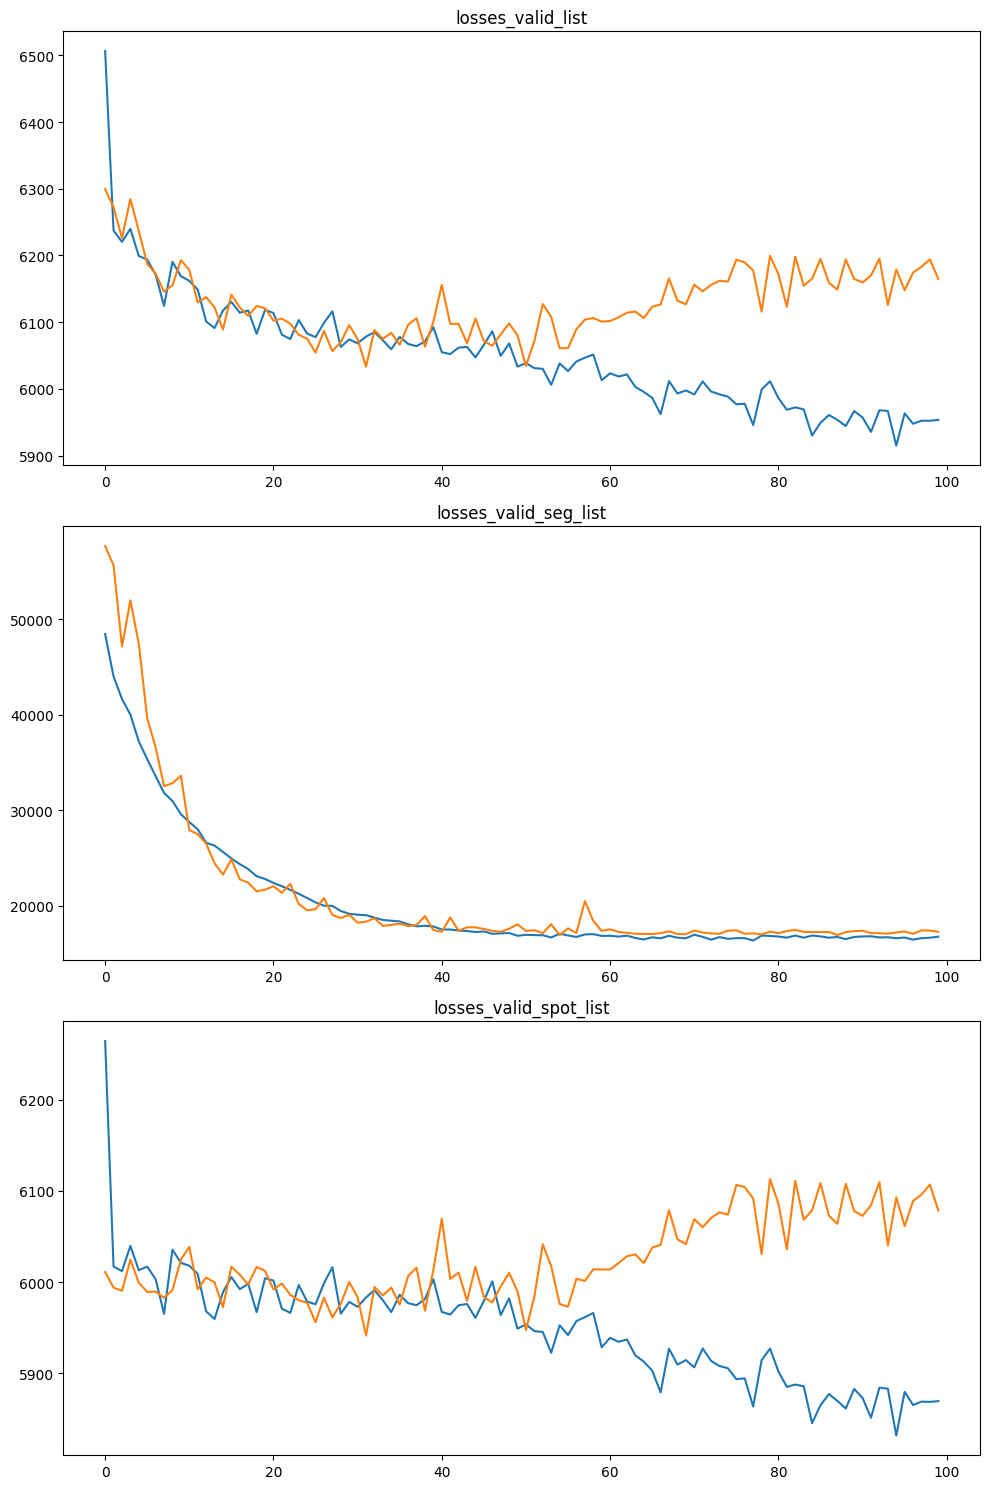

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))
loss_pairs = [
    ('losses_train_list', 'losses_valid_list'), 
    ('losses_train_seg_list', 'losses_valid_seg_list'), 
    ('losses_train_spot_list', 'losses_valid_spot_list')
    ]
# Loop through each subplot
for i, ax in enumerate(axes.flatten()):
    # Read files 
    # Plot the corresponding data
    loss_pair = loss_pairs[i]
    for loss in loss_pair:
        ax.plot(losses.__dict__[loss])
        ax.set_title(loss)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

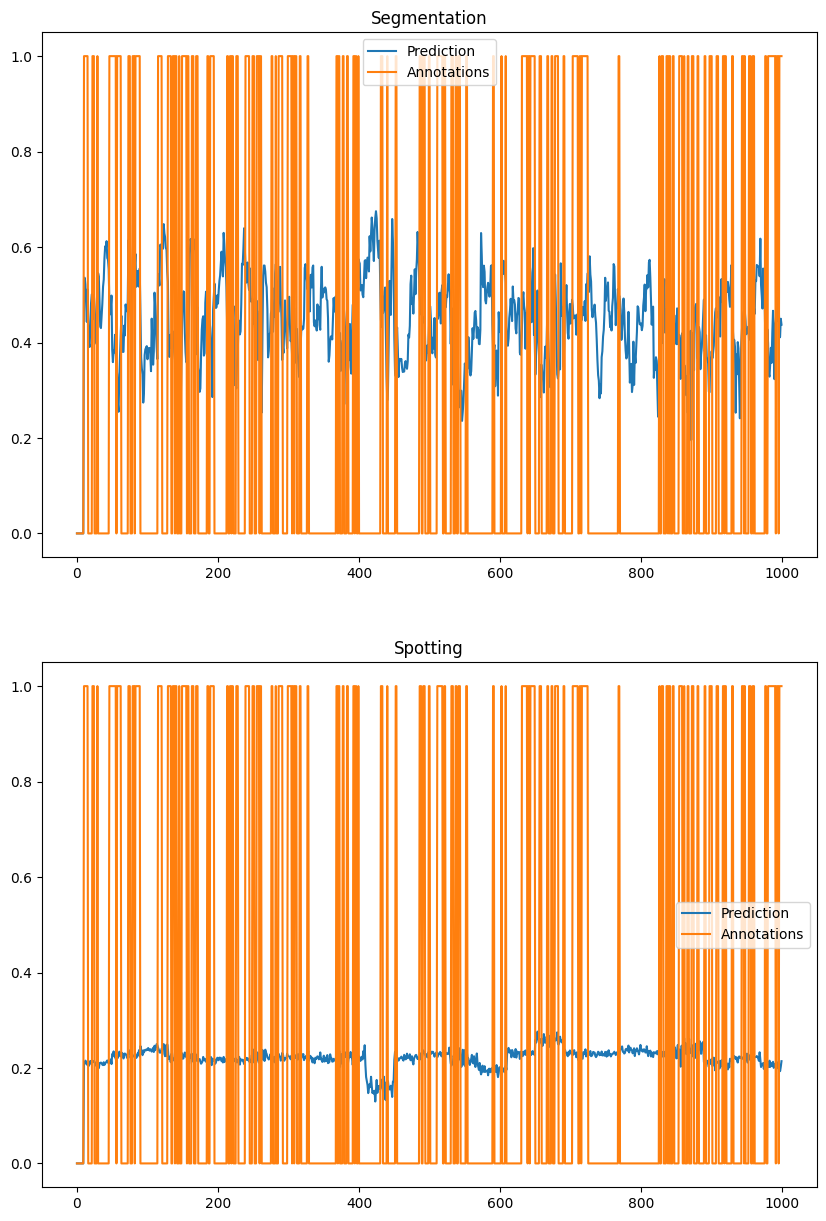

In [12]:
args = Args
collate_fn = collateVisGCN
model_path = "models/detector.pth.tar"
model = torch.load(model_path)
visualiser = Visualiser(collate_fn, args, model, smoothing=True)
visualiser.plot_predictions(frame_threshold=5000, save_dir="plots/PredictionsPlot.png", annotation="Pass")
# visualiser.visualize(frame_threshold=5000, save_dir="animations/PredictionsAnnotated.mp4", interval=60)
# mAP = visualiser.calculate_MAP()

# Model 2 - Second try (longer events only, different K values)

In [3]:
@dataclass
class Args:
    receptive_field = 20
    framerate = 5
    chunks_per_epoch = 1824
    class_split = "alive"
    num_detections = 200
    chunk_size = 60
    batch_size = 32
    input_channel = 10
    feature_multiplier=1
    backbone_player = "GCN"
    max_epochs=50
    load_weights=None
    model_name="Testing_Model"
    evaluation_frequency=20
    dim_capsule=16
    lambda_coord=5.0
    lambda_noobj=0.5
    loss_weight_segmentation=0.01
    loss_weight_detection=1.0
    patience=25
    LR=1e-03
    GPU=0 
    max_num_worker=1
    loglevel='INFO'
    annotation_nr = 15

In [4]:
args = Args
collate_fn = collateGCN

train_dataset = CALFData(split="train", args=args)
validation_dataset = CALFData(split="validate", args=args)

train_loader = torch.utils.data.DataLoader(train_dataset,
            batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)

validate_loader = torch.utils.data.DataLoader(validation_dataset,
            batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)

# labels, targets, representations = next(iter(train_loader))

model = ContextAwareModel(num_classes=15, args=args)
criterion_segmentation = ContextAwareLoss(K=train_dataset.K_parameters)
criterion_spotting = SpottingLoss(lambda_coord=args.lambda_coord, lambda_noobj=args.lambda_noobj)
optimizer = torch.optim.Adam(model.parameters(), lr=args.LR, 
                            betas=(0.9, 0.999), eps=1e-07, 
                            weight_decay=0, amsgrad=False)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', verbose=True, patience=args.patience)

losses = trainer(train_loader, validate_loader,
                    model, optimizer, scheduler, 
                    [criterion_segmentation, criterion_spotting], 
                    [args.loss_weight_segmentation, args.loss_weight_detection],
                    model_name=args.model_name,
                    max_epochs=args.max_epochs, evaluation_frequency=args.evaluation_frequency)

Data preprocessing:  40%|████      | 4/10 [00:41<01:02, 10.41s/it]


KeyboardInterrupt: 

In [5]:
# torch.save(model, 'models/detector2.pth.tar')

# with open('results/detector2_results.pkl', 'wb') as file:
#     pickle.dump(losses, file)

In [ ]:
with open('results/detector_results.pkl', 'rb') as file:
    losses = pickle.load(file)
model = torch.load("models/detector.pth.tar")

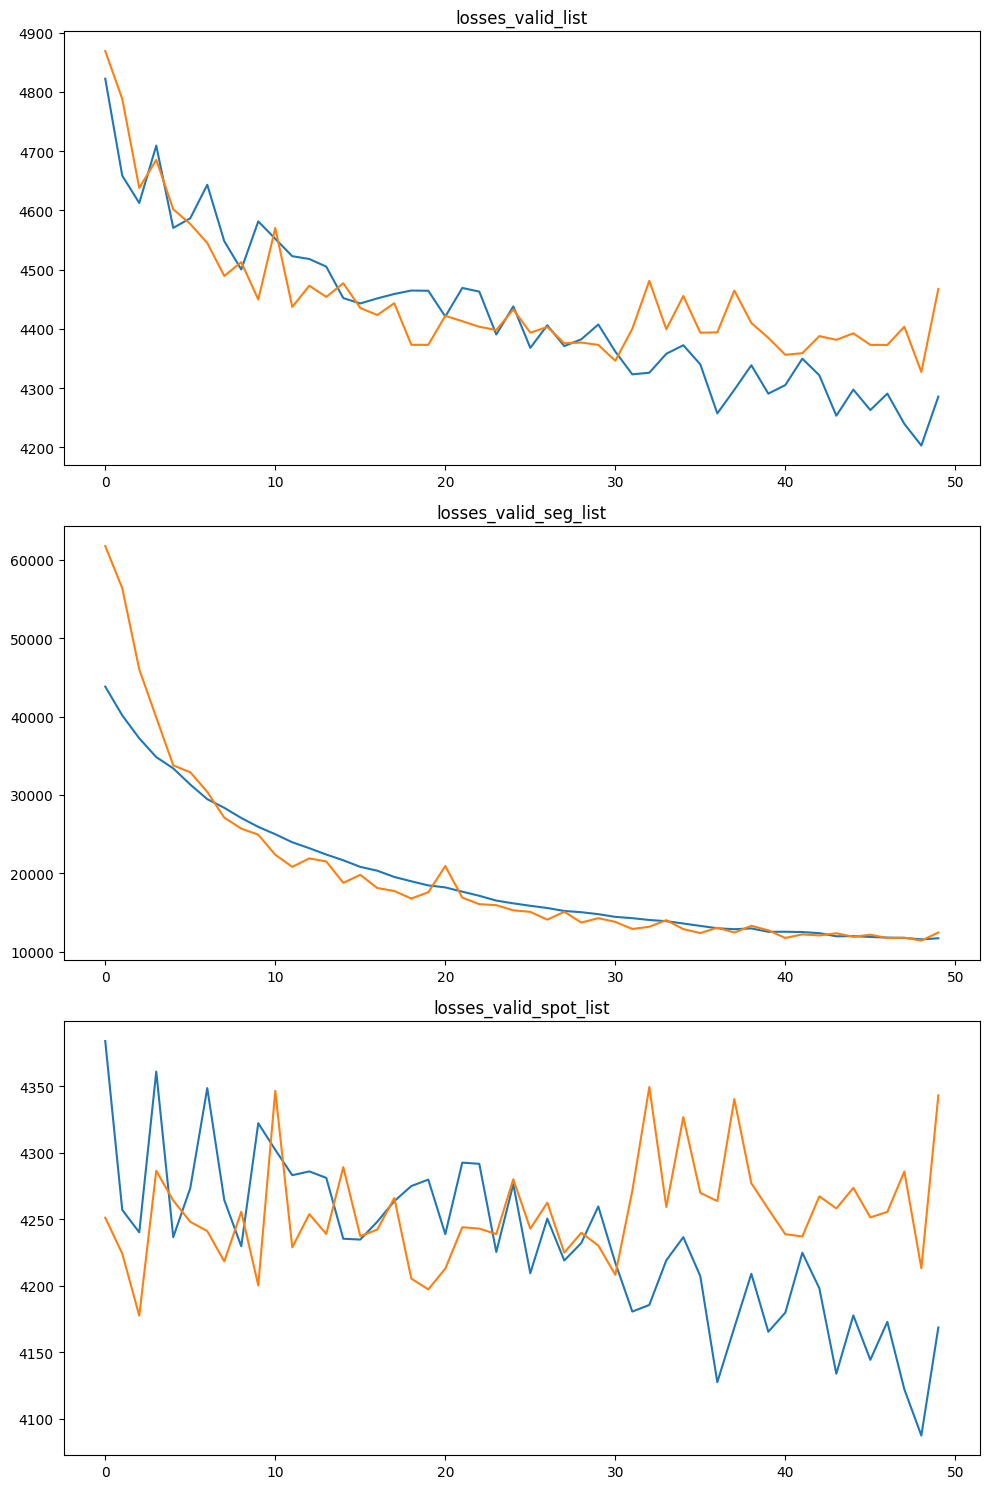

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))
loss_pairs = [
    ('losses_train_list', 'losses_valid_list'), 
    ('losses_train_seg_list', 'losses_valid_seg_list'), 
    ('losses_train_spot_list', 'losses_valid_spot_list')
    ]
# Loop through each subplot
for i, ax in enumerate(axes.flatten()):
    # Read files 
    # Plot the corresponding data
    loss_pair = loss_pairs[i]
    for loss in loss_pair:
        ax.plot(losses.__dict__[loss])
        ax.set_title(loss)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

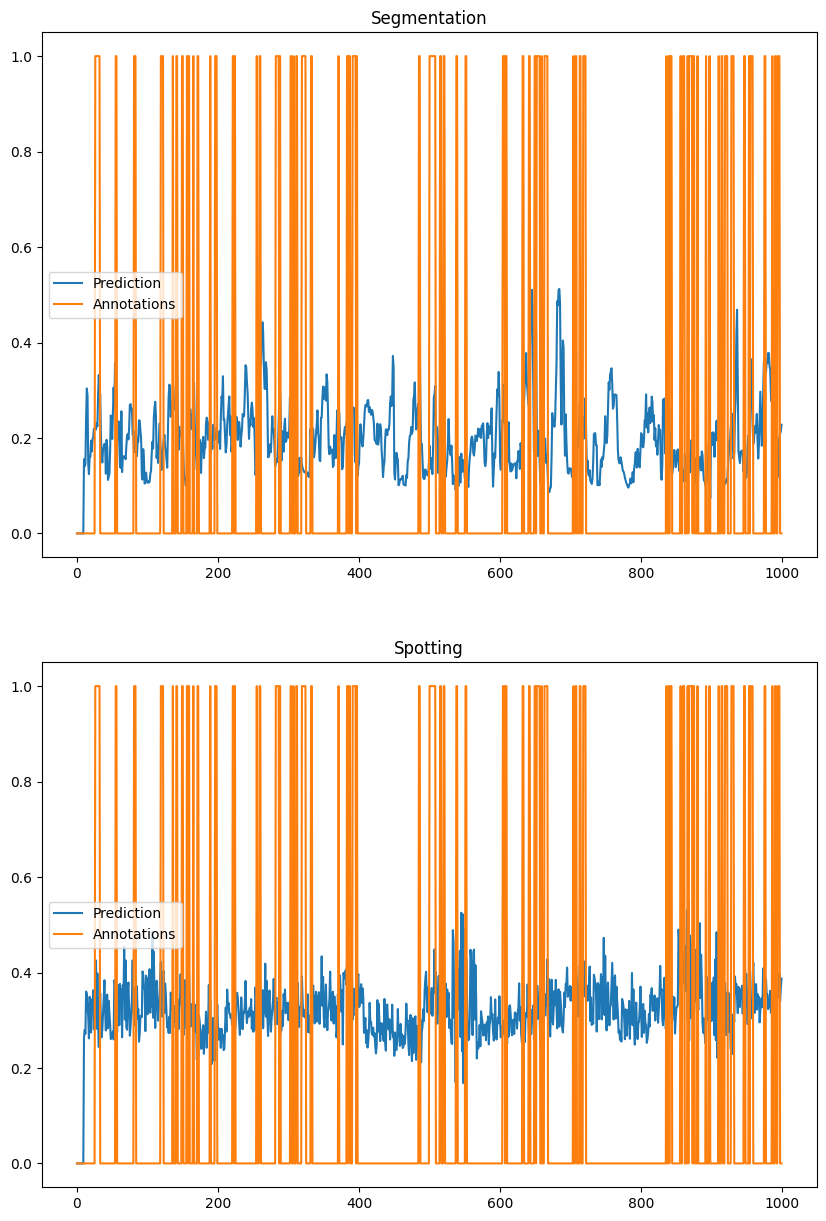

In [16]:
# args = Args
# collate_fn = collateVisGCN
# model_path = "models/detector2.pth.tar"
# model = torch.load(model_path)
# visualiser = Visualiser(collate_fn, args, model, smoothing=True)
visualiser.plot_predictions(frame_threshold=5000, save_dir="plots/PredictionsPlot.png", annotation="Pressure")
# visualiser.visualize(frame_threshold=5000, save_dir="animations/PredictionsAnnotated.mp4", interval=60)
# mAP = visualiser.calculate_MAP()

# MODEL 3 - Remove pressure annotations

In [2]:
@dataclass
class Args:
    receptive_field = 20
    framerate = 5
    chunks_per_epoch = 1824
    class_split = "alive"
    num_detections = 200
    chunk_size = 60
    batch_size = 32
    input_channel = 10
    feature_multiplier=1
    backbone_player = "GCN"
    max_epochs=50
    load_weights=None
    model_name="Testing_Model"
    evaluation_frequency=20
    dim_capsule=16
    lambda_coord=5.0
    lambda_noobj=0.5
    loss_weight_segmentation=0.01
    loss_weight_detection=1.0
    patience=25
    LR=1e-03
    GPU=0 
    max_num_worker=1
    loglevel='INFO'
    annotation_nr = 14

In [26]:
args = Args
collate_fn = collateGCN

train_dataset = CALFData(split="train", args=args)
validation_dataset = CALFData(split="validate", args=args)

train_loader = torch.utils.data.DataLoader(train_dataset,
            batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)

validate_loader = torch.utils.data.DataLoader(validation_dataset,
            batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)

# labels, targets, representations = next(iter(train_loader))

model = ContextAwareModel(num_classes=args.annotation_nr, args=args)
criterion_segmentation = ContextAwareLoss(K=train_dataset.K_parameters)
criterion_spotting = SpottingLoss(lambda_coord=args.lambda_coord, lambda_noobj=args.lambda_noobj)
optimizer = torch.optim.Adam(model.parameters(), lr=args.LR, 
                            betas=(0.9, 0.999), eps=1e-07, 
                            weight_decay=0, amsgrad=False)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', verbose=True, patience=args.patience)

losses = trainer(train_loader, validate_loader,
                    model, optimizer, scheduler, 
                    [criterion_segmentation, criterion_spotting], 
                    [args.loss_weight_segmentation, args.loss_weight_detection],
                    model_name=args.model_name,
                    max_epochs=args.max_epochs, evaluation_frequency=args.evaluation_frequency)

Train 1: Time 7.068s (it:7.007s) Data:0.554s (it:0.505s) Loss 3.5268e+03 Loss Seg 1.0986e+04 Loss Spot 3.4170e+03 : 100%|███████| 57/57 [06:42<00:00,  7.07s/it]
Evaluate 1: Time 4.907s (it:4.813s) Data:0.498s (it:0.450s) Loss 3.5308e+03 Loss Seg 1.0812e+04 Loss Spot 3.4226e+03 : 100%|████| 57/57 [04:39<00:00,  4.91s/it]
Train 2: Time 7.038s (it:7.014s) Data:0.556s (it:0.503s) Loss 3.5514e+03 Loss Seg 1.1052e+04 Loss Spot 3.4409e+03 : 100%|███████| 57/57 [06:41<00:00,  7.04s/it]
Evaluate 2: Time 5.146s (it:5.403s) Data:0.502s (it:0.752s) Loss 3.5349e+03 Loss Seg 1.0862e+04 Loss Spot 3.4263e+03 : 100%|████| 57/57 [04:53<00:00,  5.15s/it]
Train 3: Time 7.011s (it:7.297s) Data:0.554s (it:0.488s) Loss 3.5045e+03 Loss Seg 1.0994e+04 Loss Spot 3.3946e+03 : 100%|███████| 57/57 [06:39<00:00,  7.01s/it]
Evaluate 3: Time 4.881s (it:4.883s) Data:0.488s (it:0.448s) Loss 3.5378e+03 Loss Seg 1.0983e+04 Loss Spot 3.4279e+03 : 100%|████| 57/57 [04:38<00:00,  4.88s/it]
Train 4: Time 6.628s (it:6.422s) D

Epoch 00058: reducing learning rate of group 0 to 1.0000e-04.


Train 9: Time 6.629s (it:6.426s) Data:0.546s (it:0.492s) Loss 3.4939e+03 Loss Seg 1.0929e+04 Loss Spot 3.3846e+03 : 100%|███████| 57/57 [06:17<00:00,  6.63s/it]
Evaluate 9: Time 4.930s (it:4.911s) Data:0.492s (it:0.471s) Loss 3.5486e+03 Loss Seg 1.1012e+04 Loss Spot 3.4385e+03 : 100%|████| 57/57 [04:40<00:00,  4.93s/it]
Train 10: Time 6.628s (it:6.656s) Data:0.546s (it:0.489s) Loss 3.5536e+03 Loss Seg 1.1097e+04 Loss Spot 3.4426e+03 : 100%|██████| 57/57 [06:17<00:00,  6.63s/it]
Evaluate 10: Time 4.903s (it:4.798s) Data:0.490s (it:0.446s) Loss 3.5391e+03 Loss Seg 1.1049e+04 Loss Spot 3.4287e+03 : 100%|███| 57/57 [04:39<00:00,  4.90s/it]
Train 11: Time 6.621s (it:6.377s) Data:0.546s (it:0.486s) Loss 3.5495e+03 Loss Seg 1.1013e+04 Loss Spot 3.4393e+03 : 100%|██████| 57/57 [06:17<00:00,  6.62s/it]
Evaluate 11: Time 4.826s (it:5.074s) Data:0.488s (it:0.748s) Loss 3.5994e+03 Loss Seg 1.1176e+04 Loss Spot 3.4876e+03 : 100%|███| 57/57 [04:35<00:00,  4.83s/it]
Train 12: Time 6.588s (it:6.705s) 

Epoch 00100: reducing learning rate of group 0 to 1.0000e-05.


In [27]:
# torch.save(model, 'models/detector3_5.pth.tar')

# with open('results/detector3_5_results.pkl', 'wb') as file:
#     pickle.dump(losses, file)

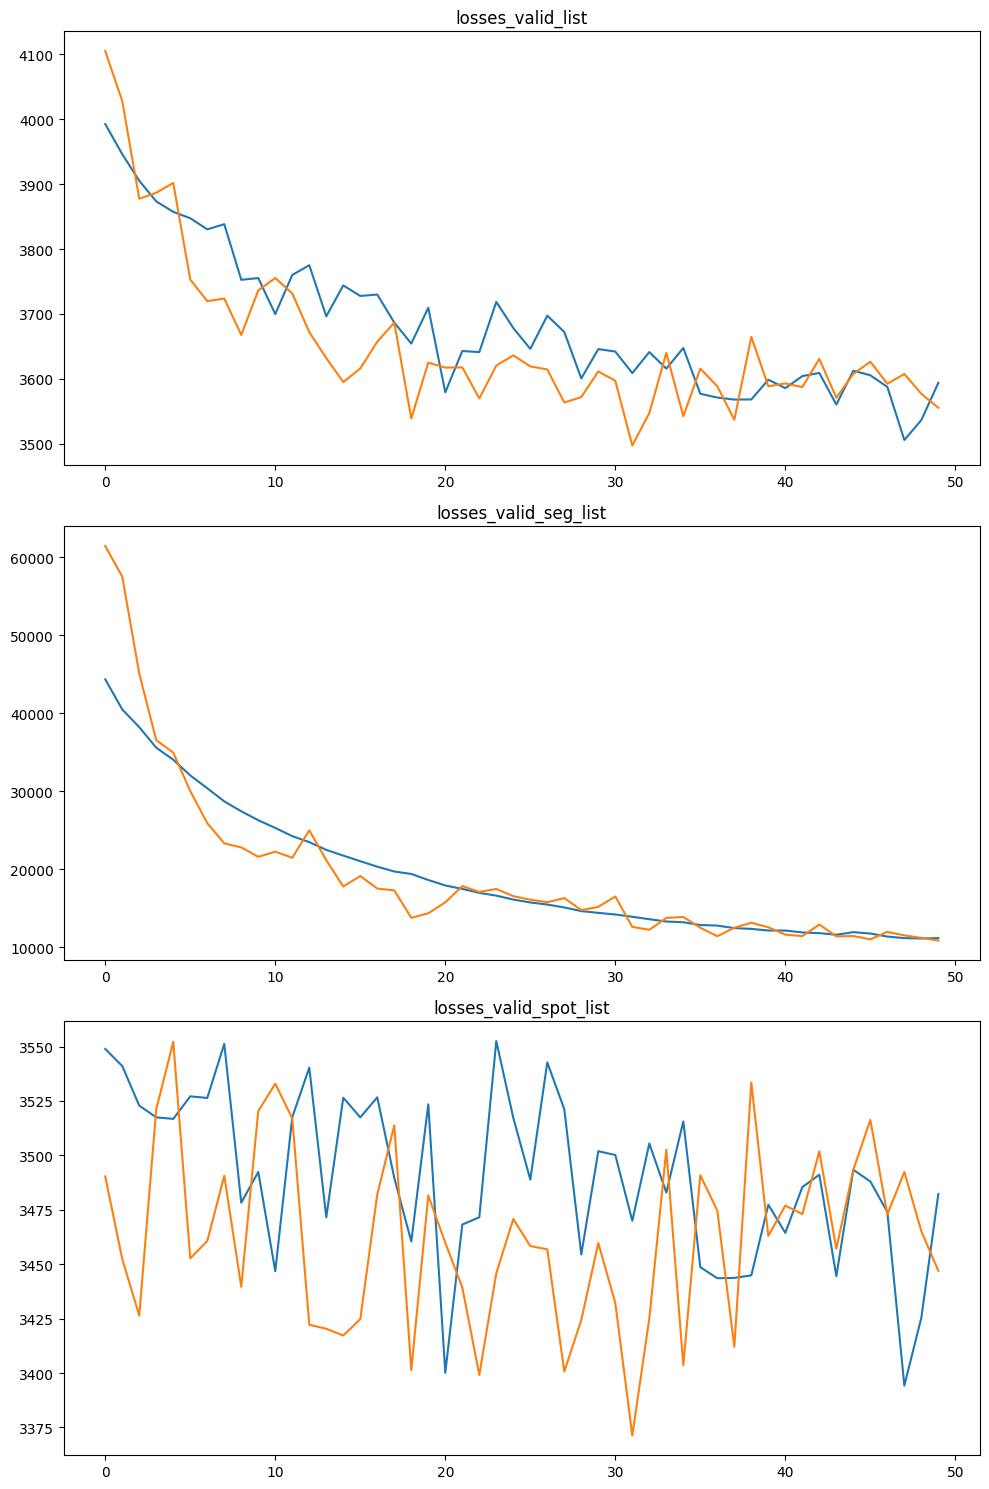

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))
loss_pairs = [
    ('losses_train_list', 'losses_valid_list'), 
    ('losses_train_seg_list', 'losses_valid_seg_list'), 
    ('losses_train_spot_list', 'losses_valid_spot_list')
    ]
# Loop through each subplot
for i, ax in enumerate(axes.flatten()):
    # Read files 
    # Plot the corresponding data
    loss_pair = loss_pairs[i]
    for loss in loss_pair:
        ax.plot(losses.__dict__[loss])
        ax.set_title(loss)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

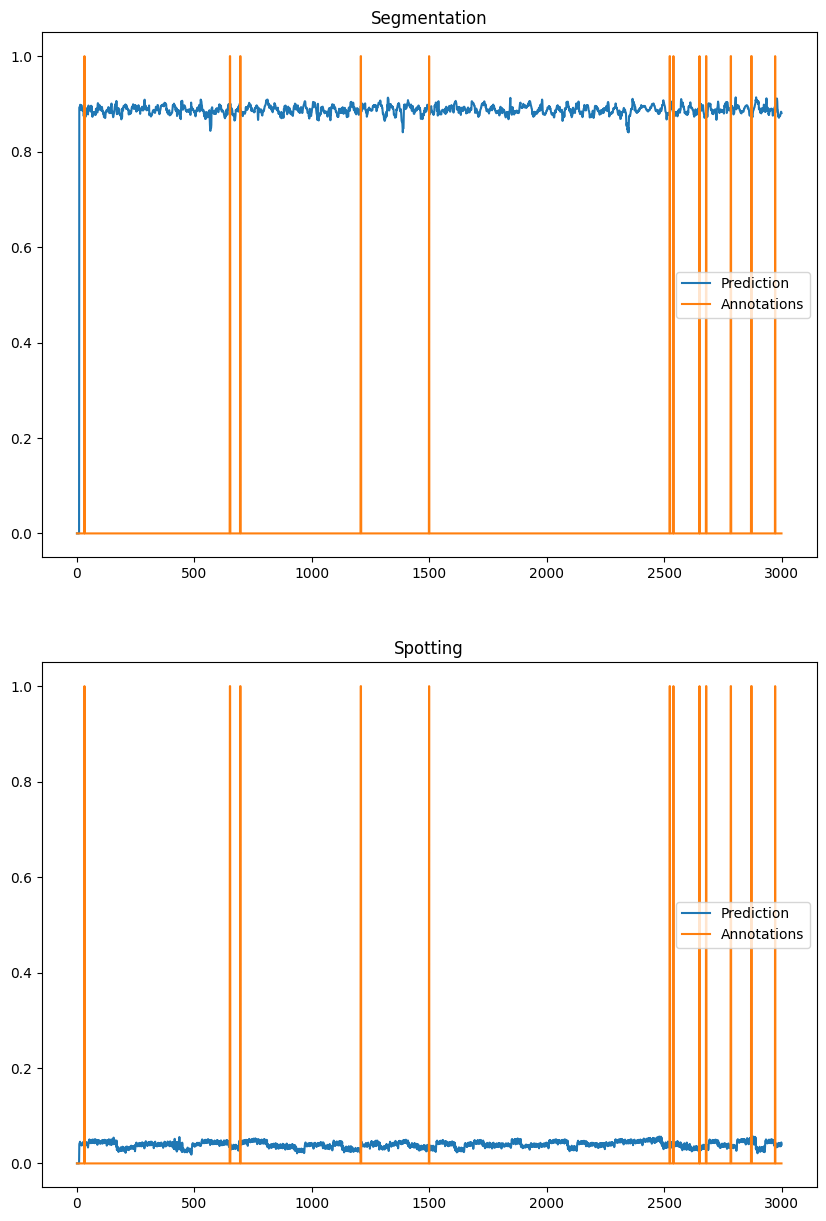

In [25]:
# args = Args
# collate_fn = collateVisGCN
# model_path = "models/detector3.pth.tar"
# model = torch.load(model_path)
# visualiser = Visualiser(collate_fn, args, model, smoothing=True)
visualiser.plot_predictions(frame_threshold=15000, save_dir="plots/PredictionsPlot.png", annotation="Dispossessed")
# visualiser.visualize(frame_threshold=5000, save_dir="animations/PredictionsAnnotated.mp4", interval=60)
# mAP = visualiser.calculate_MAP()

# MODEL 4 - Use None annotation

In [5]:
@dataclass
class Args:
    receptive_field = 20
    framerate = 5
    chunks_per_epoch = 1824
    class_split = "alive"
    num_detections = 200
    chunk_size = 60
    batch_size = 32
    input_channel = 10
    feature_multiplier=1
    backbone_player = "GCN"
    max_epochs=50
    load_weights=None
    model_name="Testing_Model"
    evaluation_frequency=20
    dim_capsule=16
    lambda_coord=5.0
    lambda_noobj=0.5
    loss_weight_segmentation=0.01
    loss_weight_detection=1.0
    patience=25
    LR=1e-03
    GPU=0 
    max_num_worker=1
    loglevel='INFO'
    annotation_nr = 16

In [4]:
args = Args
collate_fn = collateGCN

train_dataset = CALFData(split="train", args=args)
validation_dataset = CALFData(split="validate", args=args)

train_loader = torch.utils.data.DataLoader(train_dataset,
            batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)

validate_loader = torch.utils.data.DataLoader(validation_dataset,
            batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)

# labels, targets, representations = next(iter(train_loader))

# model = ContextAwareModel(num_classes=args.annotation_nr, args=args)
criterion_segmentation = ContextAwareLoss(K=train_dataset.K_parameters)
criterion_spotting = SpottingLoss(lambda_coord=args.lambda_coord, lambda_noobj=args.lambda_noobj)
optimizer = torch.optim.Adam(model.parameters(), lr=args.LR, 
                            betas=(0.9, 0.999), eps=1e-07, 
                            weight_decay=0, amsgrad=False)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', verbose=True, patience=args.patience)

losses = trainer(train_loader, validate_loader,
                    model, optimizer, scheduler, 
                    [criterion_segmentation, criterion_spotting], 
                    [args.loss_weight_segmentation, args.loss_weight_detection],
                    model_name=args.model_name,
                    max_epochs=args.max_epochs, evaluation_frequency=args.evaluation_frequency)

Data preprocessing:  10%|█         | 1/10 [00:08<01:17,  8.63s/it]

Annotations shape (28853, 16)


Data preprocessing:  20%|██        | 2/10 [00:17<01:08,  8.62s/it]

Annotations shape (29180, 16)


Data preprocessing:  30%|███       | 3/10 [00:25<00:58,  8.37s/it]

Annotations shape (29181, 16)


Data preprocessing:  40%|████      | 4/10 [00:33<00:49,  8.22s/it]

Annotations shape (27964, 16)


Data preprocessing:  50%|█████     | 5/10 [00:41<00:41,  8.35s/it]

Annotations shape (28526, 16)


Data preprocessing:  60%|██████    | 6/10 [00:49<00:32,  8.24s/it]

Annotations shape (28864, 16)


Data preprocessing:  70%|███████   | 7/10 [00:58<00:24,  8.27s/it]

Annotations shape (28869, 16)


Data preprocessing:  80%|████████  | 8/10 [01:06<00:16,  8.18s/it]

Annotations shape (28461, 16)


Data preprocessing:  90%|█████████ | 9/10 [01:14<00:08,  8.26s/it]

Annotations shape (29036, 16)


Data preprocessing: 100%|██████████| 10/10 [01:23<00:00,  8.33s/it]


Annotations shape (29821, 16)


Data preprocessing:  50%|█████     | 1/2 [00:08<00:08,  8.18s/it]

Annotations shape (29439, 16)


Data preprocessing: 100%|██████████| 2/2 [00:16<00:00,  8.02s/it]


Annotations shape (28799, 16)


Get labels & features: 100%|██████████| 2/2 [00:06<00:00,  3.13s/it]
Train 1: Time 6.926s (it:7.508s) Data:0.591s (it:1.023s) Loss 5.7549e+03 Loss Seg 4.3137e+04 Loss Spot 5.3236e+03 : 100%|███████| 57/57 [06:34<00:00,  6.93s/it]
Evaluate 1: Time 4.870s (it:4.820s) Data:0.529s (it:0.494s) Loss 5.3882e+03 Loss Seg 4.4261e+04 Loss Spot 4.9456e+03 : 100%|████| 57/57 [04:37<00:00,  4.87s/it]
Train 2: Time 6.856s (it:6.713s) Data:0.595s (it:0.537s) Loss 5.3025e+03 Loss Seg 3.9066e+04 Loss Spot 4.9119e+03 : 100%|███████| 57/57 [06:30<00:00,  6.86s/it]
Evaluate 2: Time 4.883s (it:4.860s) Data:0.527s (it:0.482s) Loss 5.3781e+03 Loss Seg 4.5122e+04 Loss Spot 4.9269e+03 : 100%|████| 57/57 [04:38<00:00,  4.88s/it]
Train 3: Time 7.041s (it:6.578s) Data:0.597s (it:0.534s) Loss 5.2971e+03 Loss Seg 3.6523e+04 Loss Spot 4.9318e+03 : 100%|███████| 57/57 [06:41<00:00,  7.04s/it]
Evaluate 3: Time 4.721s (it:4.721s) Data:0.530s (it:0.506s) Loss 5.4114e+03 Loss Seg 4.8606e+04 Loss Spot 4.9253e+03 : 100%|██

In [5]:
# torch.save(model, 'models/detector4_1.pth.tar')

# with open('results/detector4_1_results.pkl', 'wb') as file:
#     pickle.dump(losses, file)

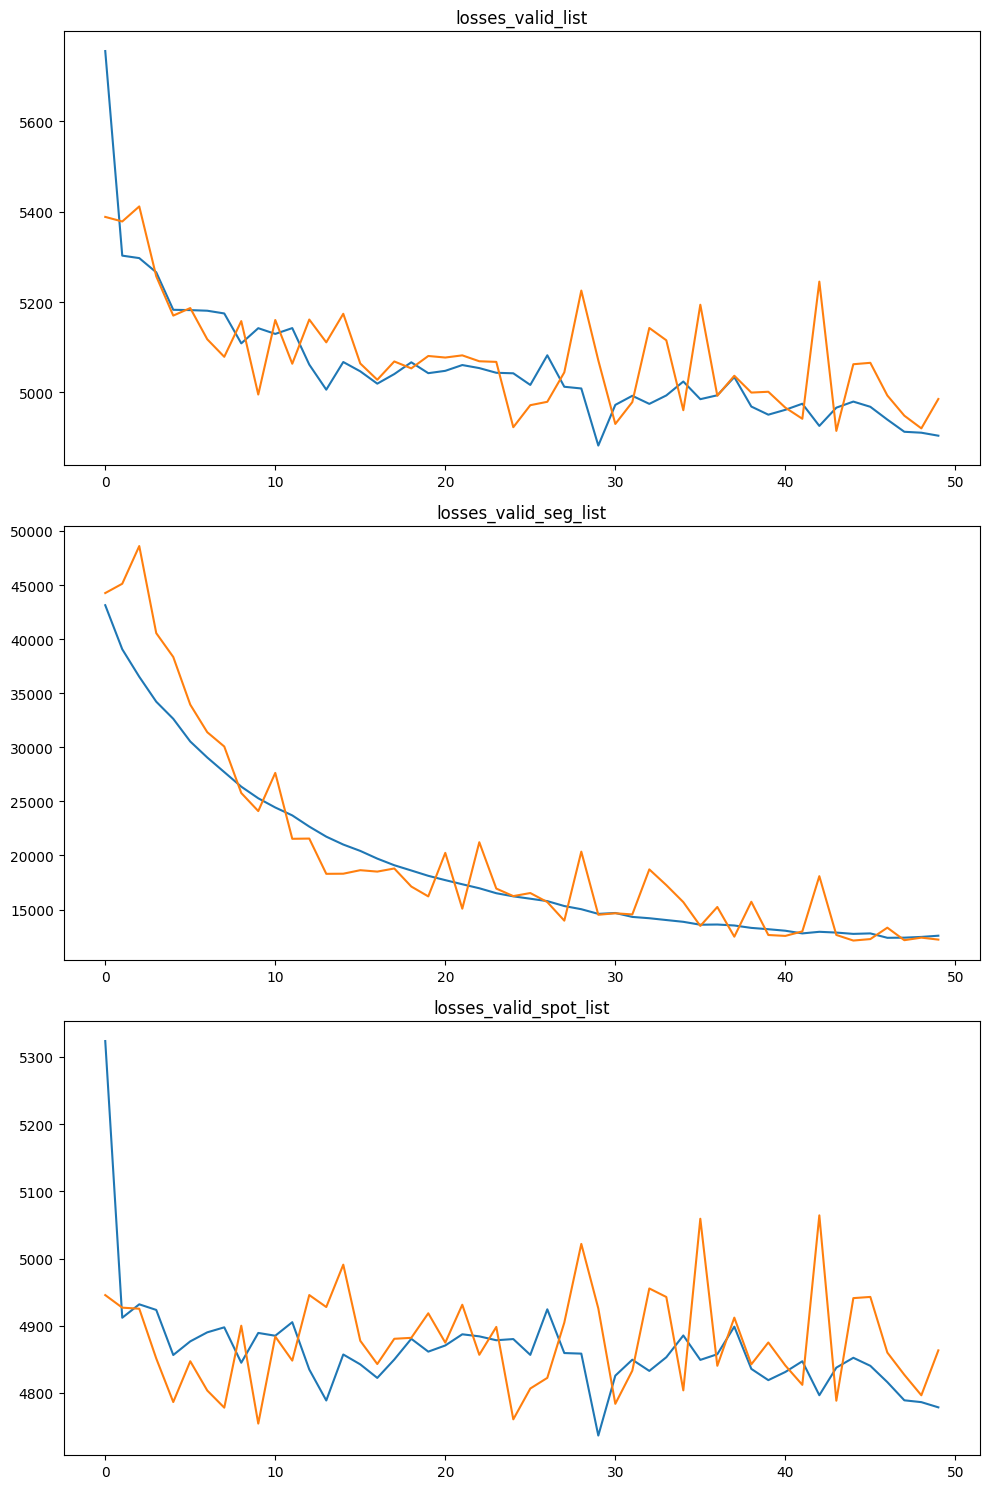

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))
loss_pairs = [
    ('losses_train_list', 'losses_valid_list'), 
    ('losses_train_seg_list', 'losses_valid_seg_list'), 
    ('losses_train_spot_list', 'losses_valid_spot_list')
    ]
# Loop through each subplot
for i, ax in enumerate(axes.flatten()):
    # Read files 
    # Plot the corresponding data
    loss_pair = loss_pairs[i]
    for loss in loss_pair:
        ax.plot(losses.__dict__[loss])
        ax.set_title(loss)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

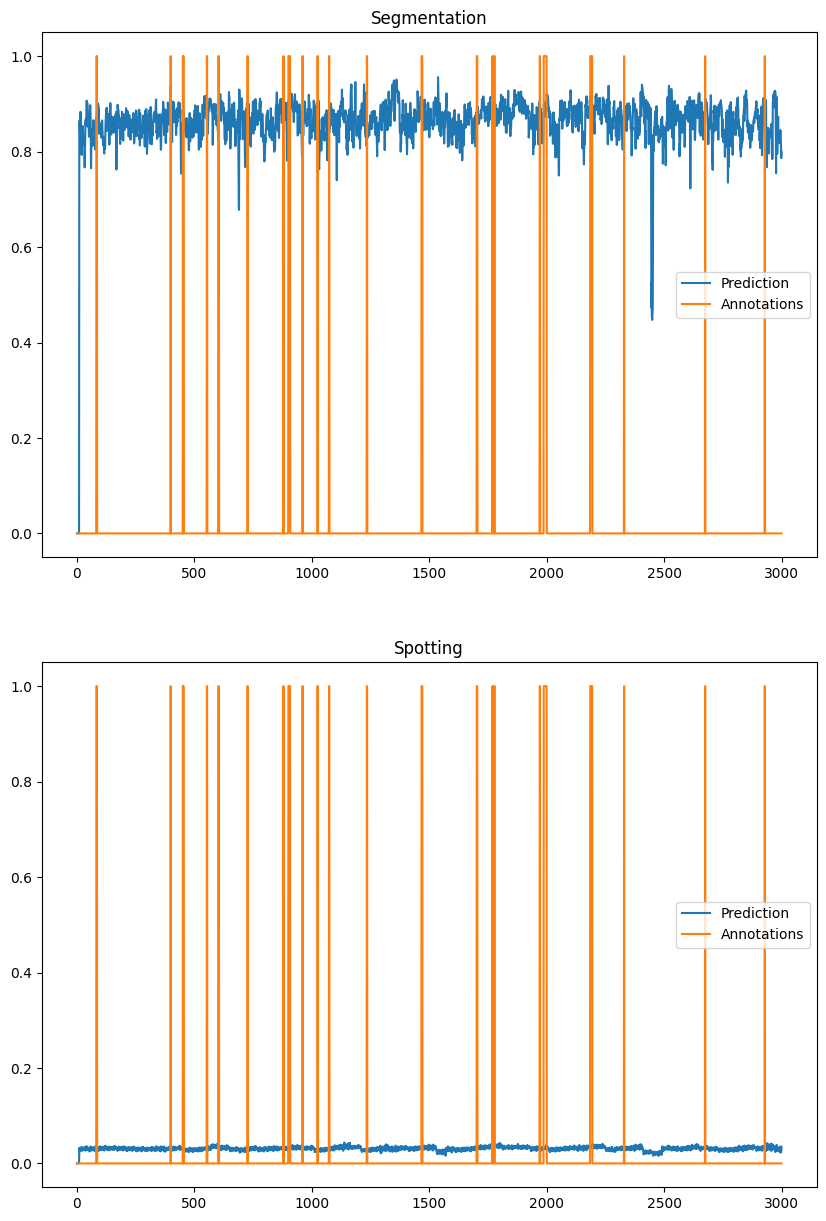

In [20]:
# args = Args
# collate_fn = collateVisGCN
# model_path = "models/detector4_1.pth.tar"
# model = torch.load(model_path)
# visualiser = Visualiser(collate_fn, args, model, smoothing=True)
visualiser.plot_predictions(frame_threshold=15000, save_dir="plots/PredictionsPlot.png", annotation="Block")
# visualiser.visualize(frame_threshold=5000, save_dir="animations/PredictionsAnnotated.mp4", interval=60)
# mAP = visualiser.calculate_MAP()

# MODEL 5

In [3]:
@dataclass
class Args:
    receptive_field = 20
    framerate = 5
    chunks_per_epoch = 1824
    class_split = "alive"
    num_detections = 200
    chunk_size = 60
    batch_size = 32
    input_channel = 10
    feature_multiplier=1
    backbone_player = "GCN"
    max_epochs=150
    load_weights=None
    model_name="Testing_Model"
    evaluation_frequency=20
    dim_capsule=16
    lambda_coord=5.0
    lambda_noobj=0.5
    loss_weight_segmentation=0.01
    loss_weight_detection=1.0
    patience=25
    LR=1e-03
    GPU=0 
    max_num_worker=1
    loglevel='INFO'
    annotation_nr = 15

In [4]:
args = Args
collate_fn = collateGCN

train_dataset = CALFData(split="train", args=args)
validation_dataset = CALFData(split="validate", args=args)

train_loader = torch.utils.data.DataLoader(train_dataset,
            batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)

validate_loader = torch.utils.data.DataLoader(validation_dataset,
            batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)

# labels, targets, representations = next(iter(train_loader))

# model = ContextAwareModel(num_classes=args.annotation_nr, args=args)
criterion_segmentation = ContextAwareLoss(K=train_dataset.K_parameters)
criterion_spotting = SpottingLoss(lambda_coord=args.lambda_coord, lambda_noobj=args.lambda_noobj)
optimizer = torch.optim.Adam(model.parameters(), lr=args.LR, 
                            betas=(0.9, 0.999), eps=1e-07, 
                            weight_decay=0, amsgrad=False)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', verbose=True, patience=args.patience)

losses = trainer(train_loader, validate_loader,
                    model, optimizer, scheduler, 
                    [criterion_segmentation, criterion_spotting], 
                    [args.loss_weight_segmentation, args.loss_weight_detection],
                    model_name=args.model_name,
                    max_epochs=args.max_epochs, evaluation_frequency=args.evaluation_frequency)

Data preprocessing:  10%|█         | 1/10 [00:08<01:19,  8.88s/it]

Annotations shape (28853, 15)


Data preprocessing:  20%|██        | 2/10 [00:17<01:10,  8.85s/it]

Annotations shape (29180, 15)


Data preprocessing:  30%|███       | 3/10 [00:25<00:59,  8.55s/it]

Annotations shape (29181, 15)


Data preprocessing:  40%|████      | 4/10 [00:34<00:50,  8.42s/it]

Annotations shape (27964, 15)


Data preprocessing:  50%|█████     | 5/10 [00:43<00:44,  8.88s/it]

Annotations shape (28526, 15)


Data preprocessing:  60%|██████    | 6/10 [00:52<00:34,  8.67s/it]

Annotations shape (28864, 15)


Data preprocessing:  70%|███████   | 7/10 [01:00<00:25,  8.66s/it]

Annotations shape (28869, 15)


Data preprocessing:  80%|████████  | 8/10 [01:09<00:17,  8.58s/it]

Annotations shape (28461, 15)


Data preprocessing:  90%|█████████ | 9/10 [01:17<00:08,  8.61s/it]

Annotations shape (29036, 15)


Data preprocessing: 100%|██████████| 10/10 [01:26<00:00,  8.68s/it]


Annotations shape (29821, 15)


Data preprocessing:  50%|█████     | 1/2 [00:08<00:08,  8.29s/it]

Annotations shape (29439, 15)


Data preprocessing: 100%|██████████| 2/2 [00:16<00:00,  8.15s/it]


Annotations shape (28799, 15)


Get labels & features: 100%|██████████| 2/2 [00:06<00:00,  3.21s/it]
Train 1: Time 7.603s (it:7.896s) Data:0.605s (it:0.577s) Loss 5.0039e+03 Loss Seg 4.4201e+04 Loss Spot 4.5619e+03 : 100%|███████| 57/57 [07:13<00:00,  7.60s/it]
Evaluate 1: Time 5.658s (it:6.011s) Data:0.565s (it:0.543s) Loss 4.4661e+03 Loss Seg 5.1732e+04 Loss Spot 3.9488e+03 : 100%|████| 57/57 [05:22<00:00,  5.66s/it]
Train 2: Time 7.483s (it:8.899s) Data:0.621s (it:1.315s) Loss 4.5003e+03 Loss Seg 3.9406e+04 Loss Spot 4.1062e+03 : 100%|███████| 57/57 [07:06<00:00,  7.48s/it]
Evaluate 2: Time 5.732s (it:6.007s) Data:0.562s (it:0.830s) Loss 4.4667e+03 Loss Seg 4.6858e+04 Loss Spot 3.9981e+03 : 100%|████| 57/57 [05:26<00:00,  5.73s/it]
Train 3: Time 7.906s (it:8.069s) Data:0.635s (it:1.044s) Loss 4.3973e+03 Loss Seg 3.6699e+04 Loss Spot 4.0303e+03 : 100%|███████| 57/57 [07:30<00:00,  7.91s/it]
Evaluate 3: Time 5.205s (it:5.259s) Data:0.544s (it:0.501s) Loss 4.4712e+03 Loss Seg 4.4613e+04 Loss Spot 4.0250e+03 : 100%|██

Epoch 00060: reducing learning rate of group 0 to 1.0000e-04.


Train 61: Time 6.911s (it:6.814s) Data:0.586s (it:0.529s) Loss 3.8696e+03 Loss Seg 1.1740e+04 Loss Spot 3.7522e+03 : 100%|██████| 57/57 [06:33<00:00,  6.91s/it]
Evaluate 61: Time 4.946s (it:4.893s) Data:0.532s (it:0.490s) Loss 4.1878e+03 Loss Seg 1.1571e+04 Loss Spot 4.0721e+03 : 100%|███| 57/57 [04:41<00:00,  4.95s/it]
Train 62: Time 6.880s (it:6.823s) Data:0.589s (it:0.532s) Loss 3.7308e+03 Loss Seg 1.1539e+04 Loss Spot 3.6155e+03 : 100%|██████| 57/57 [06:32<00:00,  6.88s/it]
Evaluate 62: Time 4.960s (it:4.925s) Data:0.534s (it:0.490s) Loss 4.1930e+03 Loss Seg 1.1719e+04 Loss Spot 4.0758e+03 : 100%|███| 57/57 [04:42<00:00,  4.96s/it]
Train 63: Time 6.916s (it:6.698s) Data:0.586s (it:0.532s) Loss 3.7547e+03 Loss Seg 1.1548e+04 Loss Spot 3.6392e+03 : 100%|██████| 57/57 [06:34<00:00,  6.92s/it]
Evaluate 63: Time 4.955s (it:4.977s) Data:0.533s (it:0.493s) Loss 4.2005e+03 Loss Seg 1.1568e+04 Loss Spot 4.0848e+03 : 100%|███| 57/57 [04:42<00:00,  4.95s/it]
Train 64: Time 7.130s (it:7.080s) 

KeyboardInterrupt: 

In [ ]:
# torch.save(model, 'models/detector5_1.pth.tar')

# with open('results/detector5_1_results.pkl', 'wb') as file:
#     pickle.dump(losses, file)

# MODEL 6 - Play with parameters

In [2]:
@dataclass
class Args:
    receptive_field = 50
    framerate = 5
    chunks_per_epoch = 1824
    class_split = "alive"
    num_detections = 200
    chunk_size = 60
    batch_size = 32
    input_channel = 10
    feature_multiplier=1
    backbone_player = "GCN"
    max_epochs=50
    load_weights=None
    model_name="models/detector6_1.pth.tar"
    evaluation_frequency=20
    dim_capsule=16
    lambda_coord=5.0
    lambda_noobj=0.5
    loss_weight_segmentation=1.5
    loss_weight_detection=1.0
    patience=25
    LR=1e-03
    GPU=0 
    max_num_worker=1
    loglevel='INFO'
    annotation_nr = 14

In [3]:
args = Args
collate_fn = collateGCN

train_dataset = CALFData(split="train", args=args)
validation_dataset = CALFData(split="validate", args=args)

train_loader = torch.utils.data.DataLoader(train_dataset,
            batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)

validate_loader = torch.utils.data.DataLoader(validation_dataset,
            batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)

labels, targets, representations = next(iter(train_loader))

model = ContextAwareModel(num_classes=args.annotation_nr, args=args)
criterion_segmentation = ContextAwareLoss(K=train_dataset.K_parameters)
criterion_spotting = SpottingLoss(lambda_coord=args.lambda_coord, lambda_noobj=args.lambda_noobj)
optimizer = torch.optim.Adam(model.parameters(), lr=args.LR, 
                            betas=(0.9, 0.999), eps=1e-07, 
                            weight_decay=0, amsgrad=False)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', verbose=True, patience=args.patience)

losses = trainer(train_loader, validate_loader,
                    model, optimizer, scheduler, 
                    [criterion_segmentation, criterion_spotting], 
                    [args.loss_weight_segmentation, args.loss_weight_detection],
                    model_name=args.model_name,
                    max_epochs=args.max_epochs, evaluation_frequency=args.evaluation_frequency)

Get labels & features: 100%|██████████| 2/2 [00:03<00:00,  1.97s/it]
Train 1: Time 7.203s (it:7.021s) Data:0.555s (it:0.504s) Loss 1.7677e+04 Loss Seg 1.1052e+04 Loss Spot 1.0992e+03 : 100%|███████| 57/57 [06:50<00:00,  7.20s/it]
Evaluate 1: Time 5.394s (it:5.998s) Data:0.504s (it:0.738s) Loss 1.6728e+04 Loss Seg 1.0493e+04 Loss Spot 9.8844e+02 : 100%|████| 57/57 [05:07<00:00,  5.39s/it]
Train 2: Time 7.068s (it:7.097s) Data:0.560s (it:0.502s) Loss 1.6026e+04 Loss Seg 1.0013e+04 Loss Spot 1.0068e+03 : 100%|███████| 57/57 [06:42<00:00,  7.07s/it]
Evaluate 2: Time 5.067s (it:4.946s) Data:0.497s (it:0.445s) Loss 1.3672e+04 Loss Seg 8.4381e+03 Loss Spot 1.0148e+03 : 100%|████| 57/57 [04:48<00:00,  5.07s/it]
Train 3: Time 6.969s (it:6.581s) Data:0.561s (it:0.495s) Loss 1.5172e+04 Loss Seg 9.4228e+03 Loss Spot 1.0373e+03 : 100%|███████| 57/57 [06:37<00:00,  6.97s/it]
Evaluate 3: Time 5.181s (it:5.146s) Data:0.492s (it:0.447s) Loss 1.2715e+04 Loss Seg 7.7872e+03 Loss Spot 1.0345e+03 : 100%|██

KeyboardInterrupt: 

In [4]:
# torch.save(model, 'models/detector6_1.pth.tar')

# with open('results/detector5_1_results.pkl', 'wb') as file:
#     pickle.dump(losses, file)

# MODEL 7

In [2]:
@dataclass
class Args:
    receptive_field = 20
    framerate = 5
    chunks_per_epoch = 1824
    class_split = "alive"
    num_detections = 15
    chunk_size = 60
    batch_size = 32
    input_channel = 10
    feature_multiplier=1
    backbone_player = "GCN"
    max_epochs=180
    load_weights=None
    model_name="Testing_Model"
    evaluation_frequency=20
    dim_capsule=16
    lambda_coord=5.0
    lambda_noobj=0.5
    loss_weight_segmentation=0.001
    loss_weight_detection=1.0
    patience=25
    LR=1e-03
    GPU=0 
    max_num_worker=1
    loglevel='INFO'
    annotation_nr = 14

In [11]:
args = Args
collate_fn = collateGCN

train_dataset = CALFData(split="train", args=args)
validation_dataset = CALFData(split="validate", args=args)

train_loader = torch.utils.data.DataLoader(train_dataset,
            batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)

validate_loader = torch.utils.data.DataLoader(validation_dataset,
            batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)

# labels, targets, representations = next(iter(train_loader))

model = ContextAwareModel(num_classes=args.annotation_nr, args=args)
criterion_segmentation = ContextAwareLoss(K=train_dataset.K_parameters)
criterion_spotting = SpottingLoss(lambda_coord=args.lambda_coord, lambda_noobj=args.lambda_noobj)
optimizer = torch.optim.Adam(model.parameters(), lr=args.LR, 
                            betas=(0.9, 0.999), eps=1e-07, 
                            weight_decay=0, amsgrad=False)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', verbose=True, patience=args.patience)

losses = trainer(train_loader, validate_loader,
                    model, optimizer, scheduler, 
                    [criterion_segmentation, criterion_spotting], 
                    [args.loss_weight_segmentation, args.loss_weight_detection],
                    model_name=args.model_name,
                    max_epochs=args.max_epochs, evaluation_frequency=args.evaluation_frequency)

Train 1: Time 2.697s (it:2.693s) Data:0.553s (it:0.498s) Loss 5.0863e+02 Loss Seg 2.2562e+04 Loss Spot 4.8607e+02 : 100%|███████| 57/57 [02:33<00:00,  2.70s/it]
Evaluate 1: Time 1.543s (it:1.380s) Data:0.547s (it:0.493s) Loss 5.0844e+02 Loss Seg 2.4266e+04 Loss Spot 4.8417e+02 : 100%|████| 57/57 [01:27<00:00,  1.54s/it]
Train 2: Time 2.660s (it:2.349s) Data:0.556s (it:0.493s) Loss 5.0726e+02 Loss Seg 2.1399e+04 Loss Spot 4.8586e+02 : 100%|███████| 57/57 [02:31<00:00,  2.66s/it]
Evaluate 2: Time 1.403s (it:1.797s) Data:0.543s (it:0.861s) Loss 5.0590e+02 Loss Seg 1.9923e+04 Loss Spot 4.8597e+02 : 100%|████| 57/57 [01:19<00:00,  1.40s/it]
Train 3: Time 2.542s (it:2.296s) Data:0.544s (it:0.490s) Loss 5.0712e+02 Loss Seg 2.0024e+04 Loss Spot 4.8709e+02 : 100%|███████| 57/57 [02:24<00:00,  2.54s/it]
Evaluate 3: Time 1.366s (it:1.292s) Data:0.535s (it:0.519s) Loss 5.0307e+02 Loss Seg 1.8328e+04 Loss Spot 4.8474e+02 : 100%|████| 57/57 [01:17<00:00,  1.37s/it]
Train 4: Time 2.485s (it:2.367s) D

Epoch 00048: reducing learning rate of group 0 to 1.0000e-04.


Train 49: Time 2.524s (it:2.987s) Data:0.555s (it:0.948s) Loss 4.8499e+02 Loss Seg 1.0464e+04 Loss Spot 4.7453e+02 : 100%|██████| 57/57 [02:23<00:00,  2.52s/it]
Evaluate 49: Time 1.366s (it:1.388s) Data:0.535s (it:0.580s) Loss 5.0125e+02 Loss Seg 1.0878e+04 Loss Spot 4.9037e+02 : 100%|███| 57/57 [01:17<00:00,  1.37s/it]
Train 50: Time 2.492s (it:2.465s) Data:0.546s (it:0.494s) Loss 4.7919e+02 Loss Seg 1.0572e+04 Loss Spot 4.6862e+02 : 100%|██████| 57/57 [02:22<00:00,  2.49s/it]
Evaluate 50: Time 1.365s (it:1.247s) Data:0.532s (it:0.481s) Loss 4.9969e+02 Loss Seg 1.0639e+04 Loss Spot 4.8905e+02 : 100%|███| 57/57 [01:17<00:00,  1.37s/it]
Train 51: Time 2.473s (it:2.588s) Data:0.543s (it:0.499s) Loss 4.8054e+02 Loss Seg 1.0370e+04 Loss Spot 4.7017e+02 : 100%|██████| 57/57 [02:20<00:00,  2.47s/it]
Evaluate 51: Time 1.370s (it:1.263s) Data:0.531s (it:0.485s) Loss 5.0128e+02 Loss Seg 1.0632e+04 Loss Spot 4.9065e+02 : 100%|███| 57/57 [01:18<00:00,  1.37s/it]
Train 52: Time 2.497s (it:2.350s) 

Epoch 00074: reducing learning rate of group 0 to 1.0000e-05.


Train 75: Time 2.449s (it:2.429s) Data:0.548s (it:0.496s) Loss 4.7264e+02 Loss Seg 1.0549e+04 Loss Spot 4.6209e+02 : 100%|██████| 57/57 [02:19<00:00,  2.45s/it]
Evaluate 75: Time 1.357s (it:1.367s) Data:0.546s (it:0.516s) Loss 4.9975e+02 Loss Seg 1.0754e+04 Loss Spot 4.8899e+02 : 100%|███| 57/57 [01:17<00:00,  1.36s/it]
Train 76: Time 2.430s (it:2.396s) Data:0.549s (it:0.498s) Loss 4.7547e+02 Loss Seg 1.0329e+04 Loss Spot 4.6514e+02 : 100%|██████| 57/57 [02:18<00:00,  2.43s/it]
Evaluate 76: Time 1.352s (it:1.328s) Data:0.539s (it:0.522s) Loss 5.0069e+02 Loss Seg 1.0817e+04 Loss Spot 4.8988e+02 : 100%|███| 57/57 [01:17<00:00,  1.35s/it]
Train 77: Time 2.455s (it:2.405s) Data:0.553s (it:0.525s) Loss 4.7800e+02 Loss Seg 1.0428e+04 Loss Spot 4.6757e+02 : 100%|██████| 57/57 [02:19<00:00,  2.45s/it]
Evaluate 77: Time 1.349s (it:1.634s) Data:0.543s (it:0.847s) Loss 5.0164e+02 Loss Seg 1.0690e+04 Loss Spot 4.9095e+02 : 100%|███| 57/57 [01:16<00:00,  1.35s/it]
Train 78: Time 2.423s (it:2.392s) 

Epoch 00100: reducing learning rate of group 0 to 1.0000e-06.


Train 101: Time 2.468s (it:2.373s) Data:0.548s (it:0.495s) Loss 4.7524e+02 Loss Seg 1.0420e+04 Loss Spot 4.6482e+02 : 100%|█████| 57/57 [02:20<00:00,  2.47s/it]
Evaluate 101: Time 1.389s (it:1.393s) Data:0.535s (it:0.481s) Loss 5.0139e+02 Loss Seg 1.0749e+04 Loss Spot 4.9065e+02 : 100%|██| 57/57 [01:19<00:00,  1.39s/it]
Train 102: Time 2.481s (it:2.411s) Data:0.542s (it:0.493s) Loss 4.7230e+02 Loss Seg 1.0309e+04 Loss Spot 4.6200e+02 : 100%|█████| 57/57 [02:21<00:00,  2.48s/it]
Evaluate 102: Time 1.371s (it:1.273s) Data:0.536s (it:0.483s) Loss 5.0004e+02 Loss Seg 1.0655e+04 Loss Spot 4.8938e+02 : 100%|██| 57/57 [01:18<00:00,  1.37s/it]
Train 103: Time 2.478s (it:2.893s) Data:0.552s (it:0.868s) Loss 4.7708e+02 Loss Seg 1.0418e+04 Loss Spot 4.6666e+02 : 100%|█████| 57/57 [02:21<00:00,  2.48s/it]
Evaluate 103: Time 1.365s (it:1.278s) Data:0.532s (it:0.482s) Loss 4.9819e+02 Loss Seg 1.0381e+04 Loss Spot 4.8780e+02 : 100%|██| 57/57 [01:17<00:00,  1.37s/it]
Train 104: Time 2.475s (it:2.596s)

Epoch 00126: reducing learning rate of group 0 to 1.0000e-07.


Train 127: Time 2.444s (it:2.493s) Data:0.544s (it:0.517s) Loss 4.7642e+02 Loss Seg 1.0442e+04 Loss Spot 4.6598e+02 : 100%|█████| 57/57 [02:19<00:00,  2.44s/it]
Evaluate 127: Time 1.386s (it:1.383s) Data:0.561s (it:0.530s) Loss 4.9900e+02 Loss Seg 1.0742e+04 Loss Spot 4.8826e+02 : 100%|██| 57/57 [01:18<00:00,  1.39s/it]
Train 128: Time 2.510s (it:2.421s) Data:0.552s (it:0.504s) Loss 4.7657e+02 Loss Seg 1.0394e+04 Loss Spot 4.6617e+02 : 100%|█████| 57/57 [02:23<00:00,  2.51s/it]
Evaluate 128: Time 1.339s (it:1.261s) Data:0.528s (it:0.493s) Loss 5.0222e+02 Loss Seg 1.0598e+04 Loss Spot 4.9162e+02 : 100%|██| 57/57 [01:16<00:00,  1.34s/it]
Train 129: Time 2.532s (it:2.908s) Data:0.563s (it:0.912s) Loss 4.7526e+02 Loss Seg 1.0242e+04 Loss Spot 4.6502e+02 : 100%|█████| 57/57 [02:24<00:00,  2.53s/it]
Evaluate 129: Time 1.361s (it:1.412s) Data:0.541s (it:0.484s) Loss 4.9989e+02 Loss Seg 1.0905e+04 Loss Spot 4.8899e+02 : 100%|██| 57/57 [01:17<00:00,  1.36s/it]
Train 130: Time 2.526s (it:2.467s)

Epoch 00152: reducing learning rate of group 0 to 1.0000e-08.


Train 153: Time 2.509s (it:2.418s) Data:0.558s (it:0.505s) Loss 4.7179e+02 Loss Seg 1.0380e+04 Loss Spot 4.6141e+02 : 100%|█████| 57/57 [02:23<00:00,  2.51s/it]
Evaluate 153: Time 1.372s (it:1.358s) Data:0.544s (it:0.509s) Loss 4.9837e+02 Loss Seg 1.0589e+04 Loss Spot 4.8778e+02 : 100%|██| 57/57 [01:18<00:00,  1.37s/it]
Train 154: Time 2.494s (it:2.400s) Data:0.558s (it:0.507s) Loss 4.7352e+02 Loss Seg 1.0510e+04 Loss Spot 4.6301e+02 : 100%|█████| 57/57 [02:22<00:00,  2.49s/it]
Evaluate 154: Time 1.377s (it:1.348s) Data:0.552s (it:0.485s) Loss 5.0321e+02 Loss Seg 1.0733e+04 Loss Spot 4.9248e+02 : 100%|██| 57/57 [01:18<00:00,  1.38s/it]
Train 155: Time 20.644s (it:2.526s) Data:0.556s (it:0.485s) Loss 4.7543e+02 Loss Seg 1.0431e+04 Loss Spot 4.6500e+02 : 100%|████| 57/57 [19:36<00:00, 20.64s/it]
Evaluate 155: Time 1.336s (it:1.297s) Data:0.523s (it:0.482s) Loss 4.9697e+02 Loss Seg 1.0800e+04 Loss Spot 4.8617e+02 : 100%|██| 57/57 [01:16<00:00,  1.34s/it]
Train 156: Time 18.311s (it:2.372s

In [3]:
with open('results/detector7_1_results.pkl', 'rb') as file:
    losses = pickle.load(file)
model = torch.load("models/detector7_1.pth.tar")

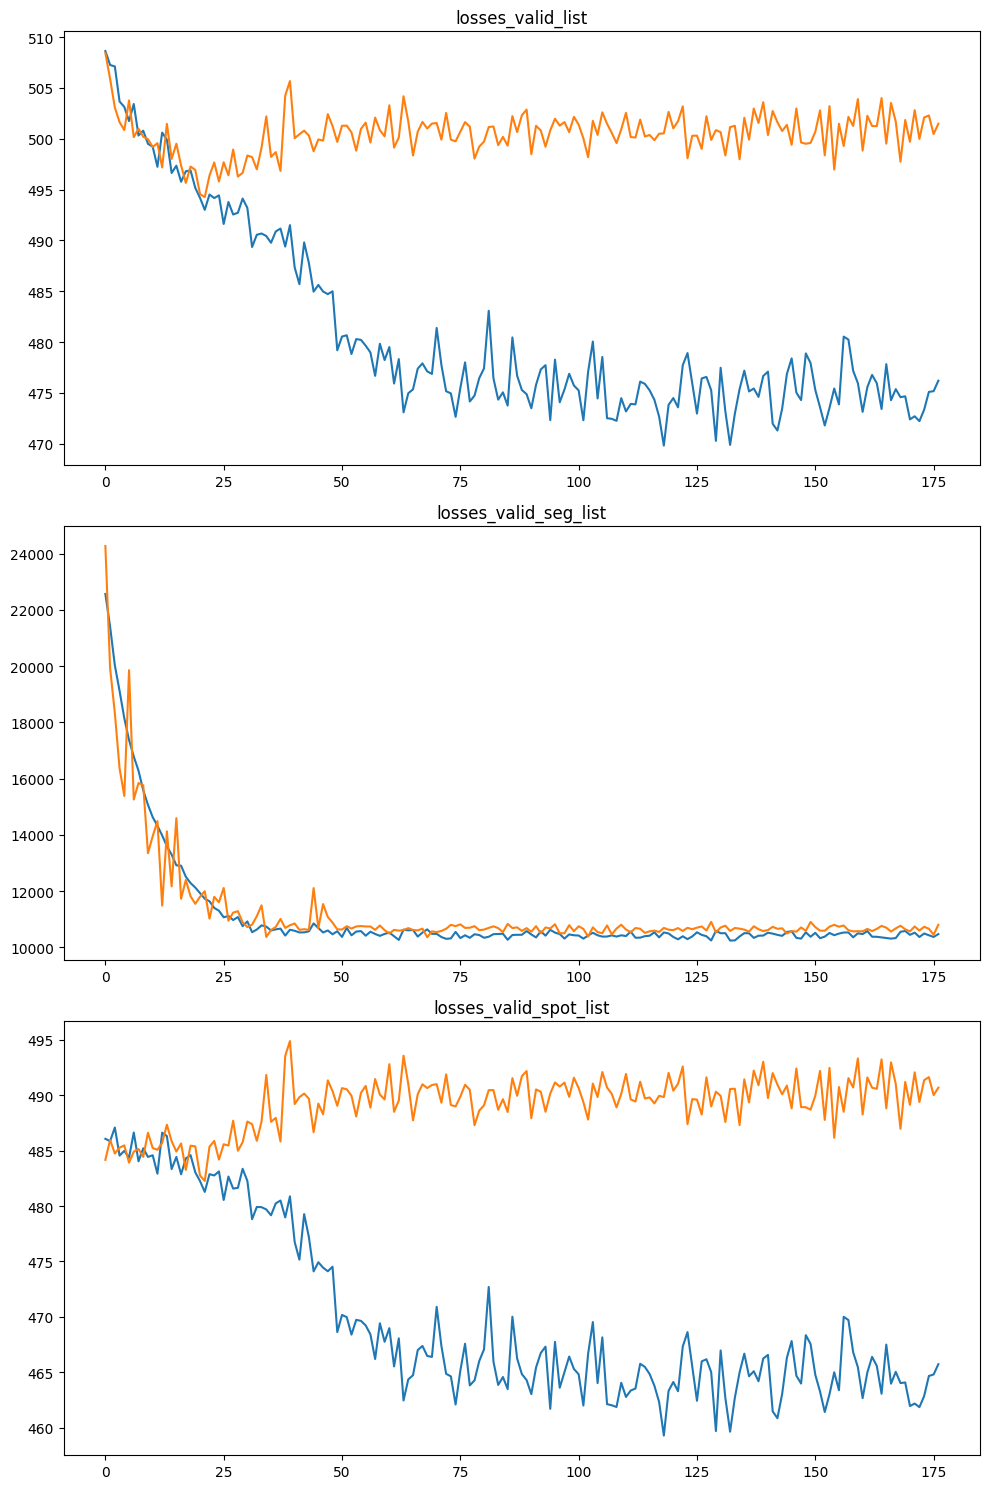

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))
loss_pairs = [
    ('losses_train_list', 'losses_valid_list'), 
    ('losses_train_seg_list', 'losses_valid_seg_list'), 
    ('losses_train_spot_list', 'losses_valid_spot_list')
    ]
# Loop through each subplot
for i, ax in enumerate(axes.flatten()):
    # Read files 
    # Plot the corresponding data
    loss_pair = loss_pairs[i]
    for loss in loss_pair:
        ax.plot(losses.__dict__[loss])
        ax.set_title(loss)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [4]:
args = Args
collate_fn = collateVisGCN
model_path = "models/detector7_1.pth.tar"
model = torch.load(model_path)
visualiser = Visualiser(collate_fn, args, model, smoothing=True)
visualiser.plot_predictions(frame_threshold=15000, save_dir="plots/PredictionsPlot.png", annotation='Goal Keeper')
# visualiser.visualize(frame_threshold=5000, save_dir="animations/PredictionsAnnotated.mp4", interval=60)
# mAP = visualiser.calculate_MAP()

Data preprocessing: 100%|██████████| 1/1 [00:08<00:00,  8.14s/it]


RuntimeError: shape '[5212, 5, 16]' is invalid for input of size 416992

# MODEL 8

In [2]:
@dataclass
class Args:
    receptive_field = 20
    framerate = 5
    chunks_per_epoch = 1824
    class_split = "alive"
    num_detections = 15
    chunk_size = 60
    batch_size = 32
    input_channel = 10
    feature_multiplier=1
    backbone_player = "GCN"
    max_epochs=180
    load_weights=None
    model_name="Testing_Model"
    evaluation_frequency=20
    dim_capsule=16
    lambda_coord=5.0
    lambda_noobj=0.5
    loss_weight_segmentation=1.5
    loss_weight_detection=1.0
    patience=25
    LR=1e-03
    GPU=0 
    max_num_worker=1
    loglevel='INFO'
    annotation_nr = 14

In [3]:
args = Args
collate_fn = collateGCN

train_dataset = CALFData(split="train", args=args)
validation_dataset = CALFData(split="validate", args=args)

train_loader = torch.utils.data.DataLoader(train_dataset,
            batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)

validate_loader = torch.utils.data.DataLoader(validation_dataset,
            batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)

# labels, targets, representations = next(iter(train_loader))

model = ContextAwareModel(num_classes=args.annotation_nr, args=args)
criterion_segmentation = ContextAwareLoss(K=train_dataset.K_parameters)
criterion_spotting = SpottingLoss(lambda_coord=args.lambda_coord, lambda_noobj=args.lambda_noobj)
optimizer = torch.optim.Adam(model.parameters(), lr=args.LR, 
                            betas=(0.9, 0.999), eps=1e-07, 
                            weight_decay=0, amsgrad=False)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', verbose=True, patience=args.patience)

losses = trainer(train_loader, validate_loader,
                    model, optimizer, scheduler, 
                    [criterion_segmentation, criterion_spotting], 
                    [args.loss_weight_segmentation, args.loss_weight_detection],
                    model_name=args.model_name,
                    max_epochs=args.max_epochs, evaluation_frequency=args.evaluation_frequency,
                    save_dir="models/detector8_1.pth.tar")

Get labels & features: 100%|██████████| 2/2 [00:03<00:00,  1.97s/it]
Train 1: Time 2.491s (it:2.446s) Data:0.491s (it:0.448s) Loss 6.6393e+04 Loss Seg 4.3924e+04 Loss Spot 5.0727e+02 : 100%|███████| 57/57 [02:21<00:00,  2.49s/it]
Evaluate 1: Time 1.439s (it:1.417s) Data:0.483s (it:0.447s) Loss 5.2697e+04 Loss Seg 3.4805e+04 Loss Spot 4.8941e+02 : 100%|████| 57/57 [01:22<00:00,  1.44s/it]
Train 2: Time 2.457s (it:2.529s) Data:0.490s (it:0.447s) Loss 6.1197e+04 Loss Seg 4.0471e+04 Loss Spot 4.8999e+02 : 100%|███████| 57/57 [02:20<00:00,  2.46s/it]
Evaluate 2: Time 1.427s (it:1.715s) Data:0.489s (it:0.749s) Loss 4.3829e+04 Loss Seg 2.8895e+04 Loss Spot 4.8667e+02 : 100%|████| 57/57 [01:21<00:00,  1.43s/it]
Train 3: Time 2.495s (it:2.423s) Data:0.487s (it:0.450s) Loss 5.7084e+04 Loss Seg 3.7731e+04 Loss Spot 4.8801e+02 : 100%|███████| 57/57 [02:22<00:00,  2.50s/it]
Evaluate 3: Time 1.441s (it:1.399s) Data:0.488s (it:0.447s) Loss 4.4477e+04 Loss Seg 2.9326e+04 Loss Spot 4.8833e+02 : 100%|██

Epoch 00085: reducing learning rate of group 0 to 1.0000e-04.


Train 86: Time 2.888s (it:2.790s) Data:0.502s (it:0.456s) Loss 1.5109e+04 Loss Seg 9.7540e+03 Loss Spot 4.7777e+02 : 100%|██████| 57/57 [02:44<00:00,  2.89s/it]
Evaluate 86: Time 1.838s (it:1.686s) Data:0.506s (it:0.452s) Loss 1.7515e+04 Loss Seg 1.1354e+04 Loss Spot 4.8483e+02 : 100%|███| 57/57 [01:44<00:00,  1.84s/it]
Train 87: Time 2.833s (it:2.678s) Data:0.501s (it:0.459s) Loss 1.5022e+04 Loss Seg 9.6961e+03 Loss Spot 4.7743e+02 : 100%|██████| 57/57 [02:41<00:00,  2.83s/it]
Evaluate 87: Time 1.724s (it:1.569s) Data:0.494s (it:0.453s) Loss 1.7396e+04 Loss Seg 1.1274e+04 Loss Spot 4.8470e+02 : 100%|███| 57/57 [01:38<00:00,  1.72s/it]
Train 88: Time 2.785s (it:2.867s) Data:0.501s (it:0.461s) Loss 1.4727e+04 Loss Seg 9.4987e+03 Loss Spot 4.7883e+02 : 100%|██████| 57/57 [02:38<00:00,  2.78s/it]
Evaluate 88: Time 1.702s (it:1.624s) Data:0.489s (it:0.446s) Loss 1.6975e+04 Loss Seg 1.0991e+04 Loss Spot 4.8906e+02 : 100%|███| 57/57 [01:37<00:00,  1.70s/it]
Train 89: Time 2.691s (it:2.708s) 

Epoch 00111: reducing learning rate of group 0 to 1.0000e-05.


Train 112: Time 2.668s (it:2.669s) Data:0.500s (it:0.456s) Loss 1.4717e+04 Loss Seg 9.4986e+03 Loss Spot 4.6953e+02 : 100%|█████| 57/57 [02:32<00:00,  2.67s/it]
Evaluate 112: Time 1.568s (it:1.523s) Data:0.485s (it:0.445s) Loss 1.7490e+04 Loss Seg 1.1333e+04 Loss Spot 4.9083e+02 : 100%|██| 57/57 [01:29<00:00,  1.57s/it]
Train 113: Time 2.681s (it:2.511s) Data:0.499s (it:0.454s) Loss 1.4349e+04 Loss Seg 9.2512e+03 Loss Spot 4.7198e+02 : 100%|█████| 57/57 [02:32<00:00,  2.68s/it]
Evaluate 113: Time 1.579s (it:1.800s) Data:0.492s (it:0.740s) Loss 1.7560e+04 Loss Seg 1.1381e+04 Loss Spot 4.8911e+02 : 100%|██| 57/57 [01:30<00:00,  1.58s/it]
Train 114: Time 2.738s (it:2.762s) Data:0.499s (it:0.460s) Loss 1.4551e+04 Loss Seg 9.3875e+03 Loss Spot 4.6951e+02 : 100%|█████| 57/57 [02:36<00:00,  2.74s/it]
Evaluate 114: Time 1.724s (it:1.800s) Data:0.497s (it:0.453s) Loss 1.7328e+04 Loss Seg 1.1227e+04 Loss Spot 4.8750e+02 : 100%|██| 57/57 [01:38<00:00,  1.72s/it]
Train 115: Time 2.827s (it:2.737s)

Epoch 00137: reducing learning rate of group 0 to 1.0000e-06.


Train 138: Time 2.735s (it:3.139s) Data:0.507s (it:0.820s) Loss 1.4490e+04 Loss Seg 9.3472e+03 Loss Spot 4.6942e+02 : 100%|█████| 57/57 [02:35<00:00,  2.73s/it]
Evaluate 138: Time 1.587s (it:1.508s) Data:0.489s (it:0.448s) Loss 1.7589e+04 Loss Seg 1.1401e+04 Loss Spot 4.8817e+02 : 100%|██| 57/57 [01:30<00:00,  1.59s/it]
Train 139: Time 2.713s (it:2.613s) Data:0.505s (it:0.452s) Loss 1.4553e+04 Loss Seg 9.3875e+03 Loss Spot 4.7183e+02 : 100%|█████| 57/57 [02:34<00:00,  2.71s/it]
Evaluate 139: Time 1.620s (it:1.569s) Data:0.492s (it:0.447s) Loss 1.7253e+04 Loss Seg 1.1175e+04 Loss Spot 4.9045e+02 : 100%|██| 57/57 [01:32<00:00,  1.62s/it]
Train 140: Time 2.718s (it:2.561s) Data:0.505s (it:0.457s) Loss 1.4664e+04 Loss Seg 9.4631e+03 Loss Spot 4.6951e+02 : 100%|█████| 57/57 [02:34<00:00,  2.72s/it]
Evaluate 140: Time 1.610s (it:1.607s) Data:0.490s (it:0.445s) Loss 1.7705e+04 Loss Seg 1.1478e+04 Loss Spot 4.8778e+02 : 100%|██| 57/57 [01:31<00:00,  1.61s/it]
Train 141: Time 2.706s (it:2.471s)

Epoch 00163: reducing learning rate of group 0 to 1.0000e-07.


Train 164: Time 2.735s (it:2.685s) Data:0.506s (it:0.460s) Loss 1.4488e+04 Loss Seg 9.3451e+03 Loss Spot 4.7035e+02 : 100%|█████| 57/57 [02:35<00:00,  2.74s/it]
Evaluate 164: Time 1.604s (it:1.955s) Data:0.497s (it:0.738s) Loss 1.7504e+04 Loss Seg 1.1344e+04 Loss Spot 4.8894e+02 : 100%|██| 57/57 [01:31<00:00,  1.60s/it]
Train 165: Time 2.681s (it:2.675s) Data:0.498s (it:0.456s) Loss 1.4569e+04 Loss Seg 9.4000e+03 Loss Spot 4.6905e+02 : 100%|█████| 57/57 [02:32<00:00,  2.68s/it]
Evaluate 165: Time 1.600s (it:1.958s) Data:0.495s (it:0.745s) Loss 1.7613e+04 Loss Seg 1.1416e+04 Loss Spot 4.8981e+02 : 100%|██| 57/57 [01:31<00:00,  1.60s/it]
Train 166: Time 2.683s (it:2.875s) Data:0.499s (it:0.458s) Loss 1.4660e+04 Loss Seg 9.4578e+03 Loss Spot 4.7291e+02 : 100%|█████| 57/57 [02:32<00:00,  2.68s/it]
Evaluate 166: Time 1.598s (it:1.485s) Data:0.497s (it:0.446s) Loss 1.7350e+04 Loss Seg 1.1239e+04 Loss Spot 4.9096e+02 : 100%|██| 57/57 [01:31<00:00,  1.60s/it]
Train 167: Time 2.711s (it:2.627s)

In [5]:
with open('results/detector8_1_results.pkl', 'wb') as file:
    pickle.dump(losses, file)

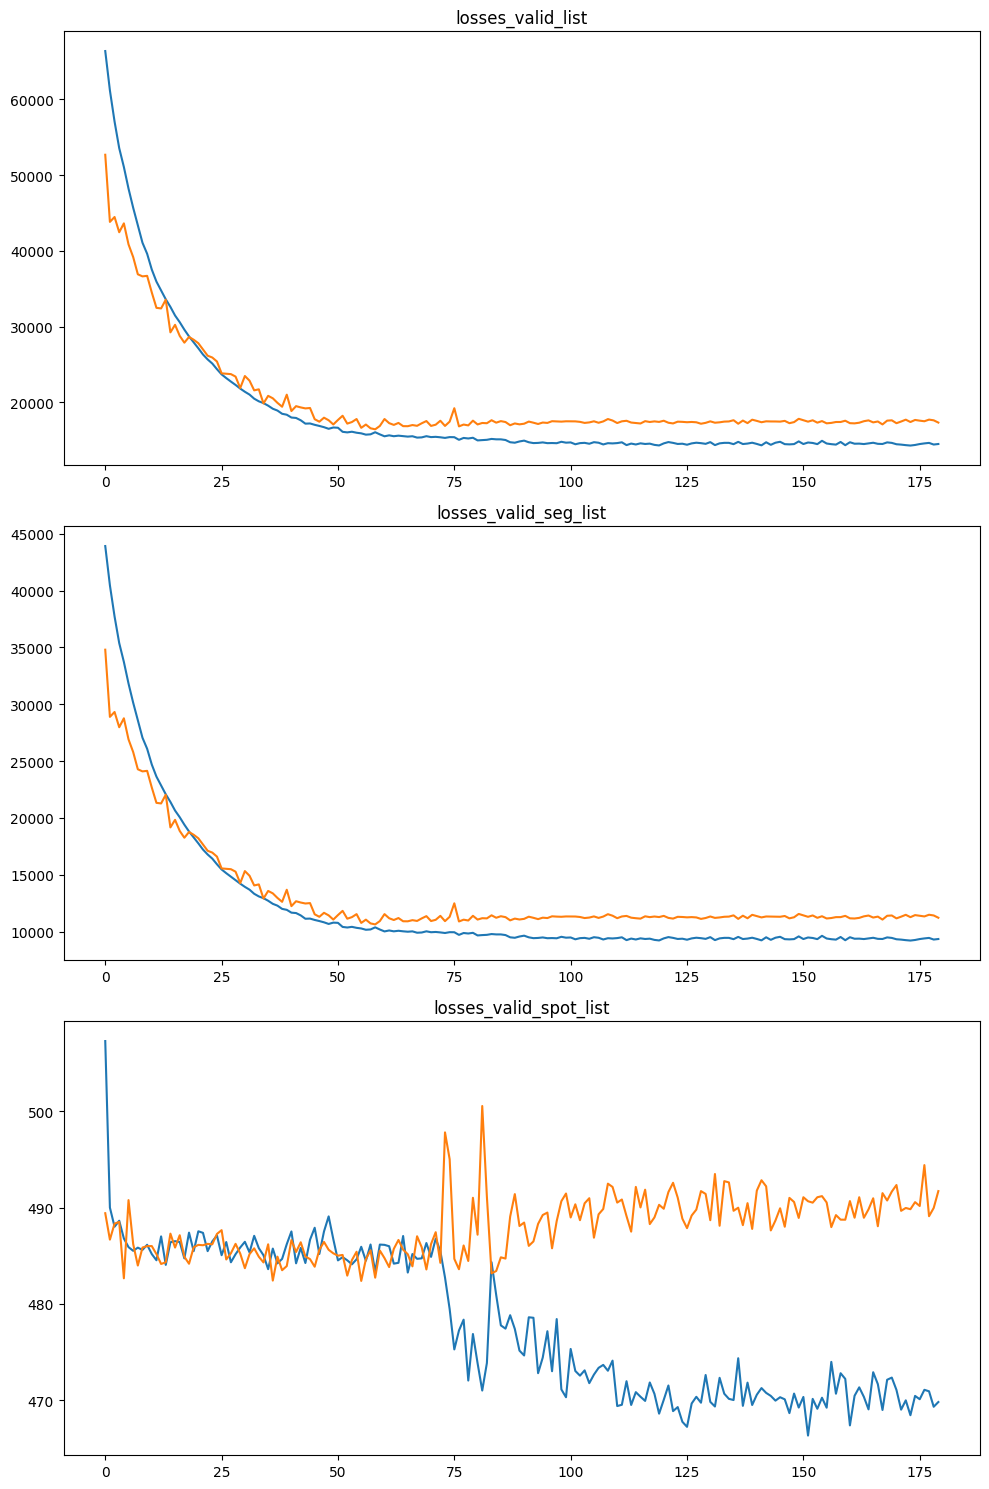

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))
loss_pairs = [
    ('losses_train_list', 'losses_valid_list'), 
    ('losses_train_seg_list', 'losses_valid_seg_list'), 
    ('losses_train_spot_list', 'losses_valid_spot_list')
    ]
# Loop through each subplot
for i, ax in enumerate(axes.flatten()):
    # Read files 
    # Plot the corresponding data
    loss_pair = loss_pairs[i]
    for loss in loss_pair:
        ax.plot(losses.__dict__[loss])
        ax.set_title(loss)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [4]:
@dataclass
class Args:
    receptive_field = 20
    framerate = 5
    chunks_per_epoch = 1824
    class_split = "alive"
    num_detections = 15
    chunk_size = 60
    batch_size = 32
    input_channel = 10
    feature_multiplier=1
    backbone_player = "GCN"
    max_epochs=180
    load_weights=None
    model_name="Testing_Model"
    evaluation_frequency=20
    dim_capsule=16
    lambda_coord=5.0
    lambda_noobj=0.5
    loss_weight_segmentation=0.001
    loss_weight_detection=1.0
    patience=25
    LR=1e-03
    GPU=0 
    max_num_worker=1
    loglevel='INFO'
    annotation_nr = 4

In [5]:
args = Args
collate_fn = collateGCN

train_dataset = CALFData(split="train", args=args)
validation_dataset = CALFData(split="validate", args=args)

train_loader = torch.utils.data.DataLoader(train_dataset,
            batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)

validate_loader = torch.utils.data.DataLoader(validation_dataset,
            batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)

# labels, targets, representations = next(iter(train_loader))

model = ContextAwareModel(num_classes=args.annotation_nr, args=args)
criterion_segmentation = ContextAwareLoss(K=train_dataset.K_parameters)
criterion_spotting = SpottingLoss(lambda_coord=args.lambda_coord, lambda_noobj=args.lambda_noobj)
optimizer = torch.optim.Adam(model.parameters(), lr=args.LR, 
                            betas=(0.9, 0.999), eps=1e-07, 
                            weight_decay=0, amsgrad=False)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', verbose=True, patience=args.patience)

losses = trainer(train_loader, validate_loader,
                    model, optimizer, scheduler, 
                    [criterion_segmentation, criterion_spotting], 
                    [args.loss_weight_segmentation, args.loss_weight_detection],
                    model_name=args.model_name,
                    max_epochs=args.max_epochs, evaluation_frequency=args.evaluation_frequency,
                    save_dir="models/detector9_1.pth.tar")

Get labels & features: 100%|██████████| 2/2 [00:01<00:00,  1.01it/s]
Train 1: Time 2.624s (it:2.750s) Data:0.557s (it:0.546s) Loss 4.0741e+02 Loss Seg 8.6787e+03 Loss Spot 3.9873e+02 : 100%|███████| 57/57 [02:29<00:00,  2.62s/it]
Evaluate 1: Time 1.479s (it:1.431s) Data:0.531s (it:0.489s) Loss 3.9232e+02 Loss Seg 8.9832e+03 Loss Spot 3.8333e+02 : 100%|████| 57/57 [01:24<00:00,  1.48s/it]
Train 2: Time 2.674s (it:2.473s) Data:0.566s (it:0.496s) Loss 3.8901e+02 Loss Seg 8.0384e+03 Loss Spot 3.8097e+02 : 100%|███████| 57/57 [02:32<00:00,  2.67s/it]
Evaluate 2: Time 1.745s (it:1.873s) Data:0.574s (it:0.523s) Loss 3.9048e+02 Loss Seg 9.0448e+03 Loss Spot 3.8144e+02 : 100%|████| 57/57 [01:39<00:00,  1.74s/it]
Train 3: Time 2.691s (it:4.178s) Data:0.568s (it:1.087s) Loss 3.8775e+02 Loss Seg 7.7710e+03 Loss Spot 3.7998e+02 : 100%|███████| 57/57 [02:33<00:00,  2.69s/it]
Evaluate 3: Time 1.940s (it:1.655s) Data:0.625s (it:0.518s) Loss 3.8520e+02 Loss Seg 6.5566e+03 Loss Spot 3.7865e+02 : 100%|██

Epoch 00055: reducing learning rate of group 0 to 1.0000e-04.


Train 56: Time 2.396s (it:2.402s) Data:0.546s (it:0.497s) Loss 2.9263e+02 Loss Seg 5.0644e+03 Loss Spot 2.8757e+02 : 100%|██████| 57/57 [02:16<00:00,  2.40s/it]
Evaluate 56: Time 1.298s (it:1.659s) Data:0.544s (it:0.795s) Loss 4.0837e+02 Loss Seg 5.0306e+03 Loss Spot 4.0334e+02 : 100%|███| 57/57 [01:13<00:00,  1.30s/it]
Train 57: Time 2.403s (it:2.270s) Data:0.541s (it:0.494s) Loss 2.9623e+02 Loss Seg 5.0410e+03 Loss Spot 2.9119e+02 : 100%|██████| 57/57 [02:16<00:00,  2.40s/it]
Evaluate 57: Time 1.297s (it:1.281s) Data:0.535s (it:0.485s) Loss 4.0558e+02 Loss Seg 5.0568e+03 Loss Spot 4.0053e+02 : 100%|███| 57/57 [01:13<00:00,  1.30s/it]
Train 58: Time 2.405s (it:2.897s) Data:0.546s (it:0.837s) Loss 2.9104e+02 Loss Seg 5.0432e+03 Loss Spot 2.8600e+02 : 100%|██████| 57/57 [02:17<00:00,  2.40s/it]
Evaluate 58: Time 1.276s (it:1.230s) Data:0.530s (it:0.485s) Loss 4.0747e+02 Loss Seg 4.9959e+03 Loss Spot 4.0248e+02 : 100%|███| 57/57 [01:12<00:00,  1.28s/it]
Train 59: Time 2.443s (it:2.415s) 

KeyboardInterrupt: 

In [2]:
x = np.load("../football_games/EC2020/BEL-RUS/annotation.npz")

In [3]:
x["array1"].shape

(20000, 4)

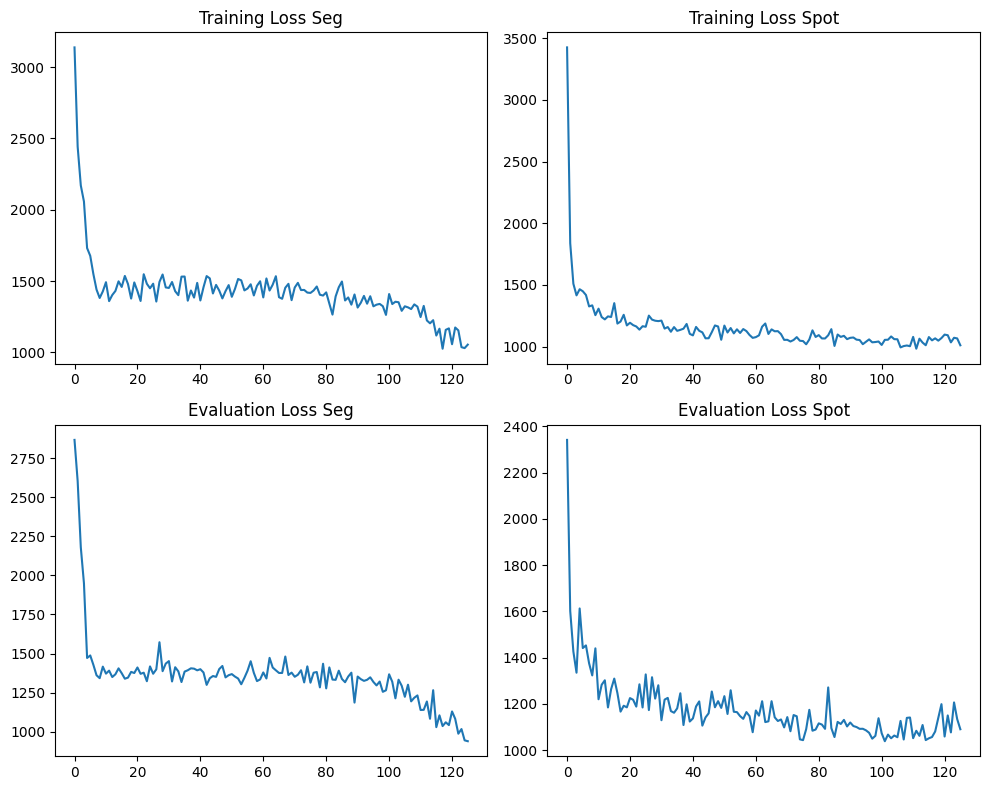

In [ ]:
paths = ["train_loss_seg.pkl","train_loss_spot.pkl","eval_loss_seg.pkl","eval_loss_spot.pkl"]
names = ["Training Loss Seg", "Training Loss Spot", "Evaluation Loss Seg", "Evaluation Loss Spot"]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Loop through each subplot
for i, ax in enumerate(axes.flatten()):
    # Read files 
    with open("results/"+paths[i], 'rb') as pickle_file:
        results = pickle.load(pickle_file)
    # Plot the corresponding data
    ax.plot(results)
    ax.set_title(names[i])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()